# Web Scrapping of JustWatch

In [1]:
#Import necessary libraries
from bs4 import BeautifulSoup
import requests

In [2]:
#Make a request to a website

movie_url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

In [3]:
response = requests.get(movie_url, headers={'User-Agent': "Mozilla/5.0"})

In [4]:
#Parse the HTML content of the webpage

movie_soup = BeautifulSoup(response.content , 'lxml')

In [5]:
# Find all div elements with class 'title-list-grid__item' which represent movie items in the webpage

grid = movie_soup.find_all('div', class_='title-list-grid__item')

In [6]:
movies_url = []

# Iterate over elements in 'grid' and construct movie URLs
for ele in grid:
    
    # Extract the URL for each movie from the anchor tag's 'href' attribute
    m_url = 'https://www.justwatch.com' + ele.find('a')['href']
    
    # Append the constructed movie URL to the movies_url list
    movies_url.append(m_url)

In [7]:
import requests  # Import the requests library for making HTTP requests
import time  # Import the time module for adding delays

def make_request_with_retry(url, max_retries=4, backoff_factor=2):
    """
    Function to make an HTTP GET request to a given URL with retries in case of failures due to rate limiting.

    Args:
    - url (str): The URL to make the request to.
    - max_retries (int): The maximum number of retries allowed.
    - backoff_factor (int): The factor by which to increase the wait time between retries.

    Returns:
    - response (requests.Response): The response object if the request is successful, else None.
    """
    retries = 0  # Initialize the retry counter

    # Start a loop to attempt the request
    while retries < max_retries:
        # Make the GET request with a custom User-Agent header
        response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})

        # Check if the server responded with a rate limiting status code (429)
        if response.status_code == 429:
            # Server indicates too many requests, so wait and retry
            retry_after = int(response.headers.get('Retry-After', 1))  # Extract the 'Retry-After' header
            time.sleep(retry_after * backoff_factor)  # Wait for the specified time, multiplied by backoff factor
            retries += 1  # Increment the retry counter
            continue  # Continue to the next iteration of the loop

        else:
            # Request successful, return the response object
            return response

    # If max retries reached without success, print a message and return None
    print("Max retries reached. Request failed.")
    return None

**This function incorporates a cooling off period to gracefully handle rate limiting (status code 429).It pauses execution for a specified duration before attempting the request again.**

In [8]:
#Making an empty list to store the value of movies
movies = []

 # Iterate over the list of movie URLs
for url in movies_url:
    try:
       # Sending an HTTP GET request to the URL using custom function "make_request_with_retry"
        resp = make_request_with_retry(url)
        
        # Parse the HTML content of the movie webpage
        soup1 = BeautifulSoup(resp.content, 'lxml')
        
        # Extract movie information
        
        # Title
        try:
            title = soup1.find('h1').text.split('(')[0].strip()
        except:
            title = None
        # Year
        try:
            year = soup1.find('span', class_='text-muted').text.strip("( )")
        except:
            year = None
        
        # Genre
        try:
            Genre = soup1.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(',')
        except:
            Genre = None
        
        # IMDB rating
        try:
            imdb_rating = soup1.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
        except:
            imdb_rating = None
        
        # Runtime
        try:
            runtime = soup1.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            runtime = None
        
        # Age rating
        try:
            age_rating = soup1.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            age_rating = None
        
        # Production country
        try:
            country = soup1.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            country = None
        
        # Stream service
        try:    
            stream_tag = soup1.find('div', class_='buybox-row stream').find_all('img')
            stream_service = [img['alt'] for img in stream_tag]
    
        except:
            stream_service = None
        
        # Create a dictionary containing movie information
        movies_info ={
            'Title' : title,
            'Release_year' : year,
            'Genre' : Genre,
            'imdb_rating' : imdb_rating,
            'Runtime' : runtime,
            'Age_rating' : age_rating,
            'Production_Country' : country,
            'Stream_Service' : stream_service,
            'URL' : url,
            'Type' : 'Movie'
            
        }
        
        # Append the movie information dictionary to the list of movies
        movies.append(movies_info)
    except Exception as e:
        
        
        #Print error message if an exception occurs
         print(f"Error processing {url}: {e}")
       

In [9]:
# Import the libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Create a pandas DataFrame from the list of movie information dictionaries

data_movie = pd.DataFrame(movies)

In [11]:
# Display the first 10 rows of the 'data_movie' DataFrame

data_movie.head(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,URL,Type
0,Hanu-Man,2024,"[Fantasy, Action & Adventure, Comedy, Scien...",8.1,2h 39min,UA,India,"[Jio Cinema, Zee5]",https://www.justwatch.com/in/movie/hanu-man,Movie
1,Oppenheimer,2023,"[Drama, History]",8.3,3h 0min,UA,"United States, United Kingdom",[Jio Cinema],https://www.justwatch.com/in/movie/oppenheimer,Movie
2,Dune,2021,"[Science-Fiction, Action & Adventure, Drama]",8.0,2h 36min,UA,United States,[Netflix],https://www.justwatch.com/in/movie/dune-2021,Movie
3,Poor Things,2023,"[Science-Fiction, Romance, Comedy, Drama]",8.0,2h 22min,A,"United Kingdom, United States, Ireland",[Hotstar],https://www.justwatch.com/in/movie/poor-things,Movie
4,Animal,2023,"[Action & Adventure, Crime, Drama, Mystery ...",6.2,3h 21min,A,India,[Netflix],https://www.justwatch.com/in/movie/animal-2022,Movie
5,Fighter,2024,"[War & Military, Action & Adventure, Mystery...",6.7,2h 47min,UA,India,[Netflix],https://www.justwatch.com/in/movie/fighter-2022,Movie
6,12th Fail,2023,[Drama],9.0,2h 27min,None,India,[Hotstar],https://www.justwatch.com/in/movie/12th-fail,Movie
7,Eagle,2024,"[Mystery & Thriller, Action & Adventure]",6.5,2h 39min,UA,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/eagle-2024,Movie
8,Anyone But You,2023,"[Comedy, Romance]",6.2,1h 43min,None,"United States, Australia",None,https://www.justwatch.com/in/movie/anyone-but-you,Movie
9,Teri Baaton Mein Aisa Uljha Jiya,2024,"[Science-Fiction, Comedy, Drama, Romance]",7.0,2h 21min,None,India,None,https://www.justwatch.com/in/movie/untitled-sh...,Movie


In [12]:
# Display Information about Movie DataFrame
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release_year        100 non-null    object
 2   Genre               100 non-null    object
 3   imdb_rating         98 non-null     object
 4   Runtime             100 non-null    object
 5   Age_rating          55 non-null     object
 6   Production_Country  100 non-null    object
 7   Stream_Service      69 non-null     object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [13]:
#Make a request to a website

tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

In [14]:
response_tv = requests.get(tv_url)

In [15]:
#Parse the HTML content of the webpage

soup_tv = BeautifulSoup(response_tv.text, 'lxml')

In [16]:
# Find all div elements with class 'title-list-grid__item' which represent show items in the webpage

grid_tv = soup_tv.find_all('div', class_='title-list-grid__item')

In [17]:
shows_url = []

# Iterate over elements in 'grid_tv' and construct movie URLs
for ele in grid_tv:
    
    # Extract the URL for each show from the anchor tag's 'href' attribute
    t_url = 'https://www.justwatch.com' + ele.find('a')['href']
    
    # Append the constructed show URL to the shows_url list
    shows_url.append(t_url)
    

In [18]:
# Creating an empty list to store shows
shows = []
 # Iterate over the list of show URLs
for url in shows_url: 
    try:
       # Sending an HTTP GET request to the URL using custom function "make_request_with_retry".
        resp = make_request_with_retry(url)
        
        # Parse the HTML content of the show webpage
        soup1 = BeautifulSoup(resp.content, 'lxml')
        
        # Extract show information.
        
        # Title
        try:
            title = soup1.find('h1').text.split('(')[0].strip()
        except:
            title = None
        # Year
        try:
            year = soup1.find('span', class_='text-muted').text.strip("( )")
        except:
            year = None
        
        # Genre
        try:
            Genre = soup1.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(', ')
        except:
            Genre = None
        
        # IMDB Rating
        try:
            imdb_rating = soup1.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
        except:
            imdb_rating = None
        
        # Runtime
        try:
            runtime = soup1.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            runtime = None
        
        # Age Rating
        try:
            age_rating = soup1.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            age_rating = None
        
        # Production Country
        try:
            country = soup1.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            country = None
        
        #Stream Service
        try:    
            stream_tag = soup1.find('div', class_='buybox-row stream').find_all('img')
            stream_service = [img['alt'] for img in stream_tag]
    
        except:
            stream_service = None
        
        # Create a dictionary containing Show information
        shows_info ={
            'Title' : title,
            'Release_year' : year,
            'Genre' : Genre,
            'imdb_rating' : imdb_rating,
            'Runtime' : runtime,
            'Age_rating' : age_rating,
            'Production_Country' : country,
            'Stream_Service' : stream_service,
            'URL' : url,
            'Type' : 'Show'
            
        }
        
        # Append the show information dictionary to the list of shows
        shows.append(shows_info)
    except Exception as e:
        
        #Print error message if an exception occurs
         print(f"Error processing {url}: {e}")

In [19]:
# Create a pandas DataFrame from the list of Show information dictionaries

data_show = pd.DataFrame(shows)

In [20]:
# Display the first 10 rows of the 'data_show' DataFrame

data_show.head(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,URL,Type
0,Shōgun,2024,"[Drama, War & Military, History]",9.1,58min,None,United States,[Hotstar],https://www.justwatch.com/in/tv-show/shogun-2024,Show
1,Mirzapur,2018,"[Action & Adventure, Drama, Crime, Mystery & T...",8.5,50min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/mirzapur,Show
2,Panchayat,2020,"[Comedy, Drama]",8.9,33min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/panchayat,Show
3,Sunflower,2021,"[Comedy, Crime]",7.5,37min,A,India,[VI movies and tv],https://www.justwatch.com/in/tv-show/sunflower...,Show
4,Game of Thrones,2011,"[Drama, Fantasy, Action & Adventure, Science-F...",9.2,59min,A,"United States, United Kingdom",[Jio Cinema],https://www.justwatch.com/in/tv-show/game-of-t...,Show
5,Maharani,2021,[Drama],7.9,44min,UA,India,"[Sony Liv, VI movies and tv]",https://www.justwatch.com/in/tv-show/maharani-...,Show
6,Maamla Legal Hai,2024,"[Drama, Comedy]",8.2,32min,None,India,[Netflix],https://www.justwatch.com/in/tv-show/maamla-le...,Show
7,Avatar: The Last Airbender,2024,"[Science-Fiction, Action & Adventure, Comedy, ...",7.3,54min,None,United States,[Netflix],https://www.justwatch.com/in/tv-show/avatar-th...,Show
8,The Gentlemen,2024,"[Action & Adventure, Comedy, Crime, Drama]",8.3,50min,A,"United Kingdom, United States",[Netflix],https://www.justwatch.com/in/tv-show/the-gentl...,Show
9,Solo Leveling,2024,"[Fantasy, Animation, Action & Adventure, Scien...",8.5,24min,None,"South Korea, Japan",[Crunchyroll],https://www.justwatch.com/in/tv-show/solo-leve...,Show


In [21]:
# Display information about Show DataFrame.

data_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release_year        100 non-null    object
 2   Genre               100 non-null    object
 3   imdb_rating         100 non-null    object
 4   Runtime             100 non-null    object
 5   Age_rating          34 non-null     object
 6   Production_Country  100 non-null    object
 7   Stream_Service      88 non-null     object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


# Data Filtering and Analysis

In [22]:
# Merging data to make a final DataFrame.

final_data = pd.concat([data_show, data_movie], ignore_index = True)

In [23]:
# Looking at the last 10 rows of DataFrame.

final_data.tail(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,URL,Type
190,To Kill a Tiger,2023,[Documentary],7.6,2h 8min,None,"Canada, United States",[Netflix],https://www.justwatch.com/in/movie/to-kill-a-t...,Movie
191,Tiger 3,2023,"[Action & Adventure, Mystery & Thriller]",5.8,2h 35min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/tiger-3,Movie
192,Wonka,2023,"[Kids & Family, Fantasy, Comedy]",7.1,1h 57min,U,"United Kingdom, United States",None,https://www.justwatch.com/in/movie/wonka,Movie
193,Land of Bad,2024,"[Mystery & Thriller, War & Military, Action ...",6.5,1h 50min,A,"Australia, Czech Republic, United States",None,https://www.justwatch.com/in/movie/land-of-bad,Movie
194,Operation Valentine,2024,"[Mystery & Thriller, Action & Adventure, Drama]",5.2,2h 10min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/operation-v...,Movie
195,777 Charlie,2022,"[Drama, Comedy]",8.7,2h 46min,UA,India,[Jio Cinema],https://www.justwatch.com/in/movie/777-charlie,Movie
196,The Marvels,2023,"[Science-Fiction, Action & Adventure]",,1h 45min,None,United States,None,https://www.justwatch.com/in/movie/the-marvels,Movie
197,Gadar 2,2023,"[Action & Adventure, Drama, Mystery & Thriller]",5.2,2h 48min,UA,India,[Zee5],https://www.justwatch.com/in/movie/gadar-2,Movie
198,Catch Me If You Can,2002,"[Crime, Drama]",8.1,2h 21min,A,United States,"[Netflix, Amazon Prime Video, Jio Cinema]",https://www.justwatch.com/in/movie/catch-me-if...,Movie
199,Perfect Days,2023,[Drama],None,2h 4min,None,"Japan, Germany",None,https://www.justwatch.com/in/movie/perfect-days,Movie


In [24]:
# Changing DataType of imdb_rating from object to float.

final_data['imdb_rating'] = final_data['imdb_rating'].replace('', None).astype(float)

In [25]:
# Display information about the final_data DataFrame

final_data.info()  # This line prints a summary of the DataFrame's structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               200 non-null    object 
 1   Release_year        200 non-null    object 
 2   Genre               200 non-null    object 
 3   imdb_rating         195 non-null    float64
 4   Runtime             200 non-null    object 
 5   Age_rating          89 non-null     object 
 6   Production_Country  200 non-null    object 
 7   Stream_Service      157 non-null    object 
 8   URL                 200 non-null    object 
 9   Type                200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [26]:
# Custom Function for changing runtime from string to TimeDate datatype.
# Import necessary libraries
from datetime import time, timedelta  # Importing time and timedelta from datetime module
def convert_to_time(time_str):
    hours = 0
    minutes = 0
    # Check if the input is null
    if pd.isnull(time_str):
        # Return NaT (Not a Time) for null values
        return pd.NaT
    
    else:

        if 'h' in time_str:
            hours_str, minutes_str = time_str.split('h')
            hours = int(hours_str.strip())
            minutes = int(minutes_str.replace('min', '').strip())
        else:
            minutes = int(time_str.replace('min', '').strip())
        
         #Return time object with extracted hours and minutes
        return time(hours, minutes)

In [27]:
final_data['Runtime']

0         58min
1         50min
2         33min
3         37min
4         59min
         ...   
195    2h 46min
196    1h 45min
197    2h 48min
198    2h 21min
199     2h 4min
Name: Runtime, Length: 200, dtype: object

In [28]:
# Apply the custom conversion function to the 'Runtime' column of the DataFrame
final_data['Runtime'] = final_data['Runtime'].apply(convert_to_time)

# Analysis on Runtime(Movie and Show)

### Average Runtime for Movie

In [44]:
# Calculate total seconds of only movies runtime
only_movie_runtime = final_data['Runtime'][final_data['Runtime'].notnull() & (final_data['Type'] == 'Movie')]

total_seconds = sum(t.hour * 3600 + t.minute * 60 for t in only_movie_runtime)
 
# Calculate mean seconds
mean_seconds = total_seconds / len(only_movie_runtime)

# Convert mean seconds to a timedelta object
mean_time = timedelta(seconds=mean_seconds)

# Convert timedelta to time object
mean_time = time(hour=mean_time.seconds // 3600, minute=(mean_time.seconds % 3600) // 60)

# Print the mean time
print("Mean time:", mean_time)

Mean time: 02:17:00


**The average runtime of movies in the dataset was found to be approximately 2 hours and 17 minutes. This suggests that movies tend to have a duration that falls within a moderate range, possibly reflecting common preferences among audiences.**

### Movie runtime Visualization

In [45]:
final_data['Runtime_minutes'] = final_data['Runtime'].apply(lambda x: x.hour*60 + x.minute)

In [51]:
# Generate descriptive statistics for only numeric columns in the DataFrame final_data
final_data.describe()

,imdb_rating,Runtime_minutes
count,195.000000,200.000000
mean,7.492308,91.155000
std,1.149851,50.864496
min,3.300000,19.000000
25%,6.700000,46.000000
50%,7.800000,85.000000
75%,8.300000,139.250000
max,9.500000,206.000000


Based on the descriptive statistics provided for the columns "imdb_rating" and "Runtime_minutes" in the DataFrame:

**IMDb Rating:** The average IMDb rating in the dataset is approximately 7.49. The ratings range from a minimum of 3.3 to a maximum of 9.5, indicating a diverse range of reception among the movies. The standard deviation of approximately 1.14 suggests some variability in the ratings, although the majority of ratings likely cluster around the mean.

**Runtime:** The average runtime is approximately 91.15 minutes. The runtimes vary widely, ranging from a minimum of 19 minutes to a maximum of 206 minutes. The standard deviation of approximately 50.86 indicates a significant spread in the lengths of the movies, with some being relatively short and others considerably longer.

**Conclusion:** Overall, the dataset consists of a diverse collection of movies with varying IMDb ratings and runtimes. While the IMDb ratings provide insight into the perceived quality of the movies, the runtime information offers an understanding of the length distribution within the dataset. This analysis can help inform decisions related to movie selection, understanding audience preferences, and identifying potential trends in movie characteristics.

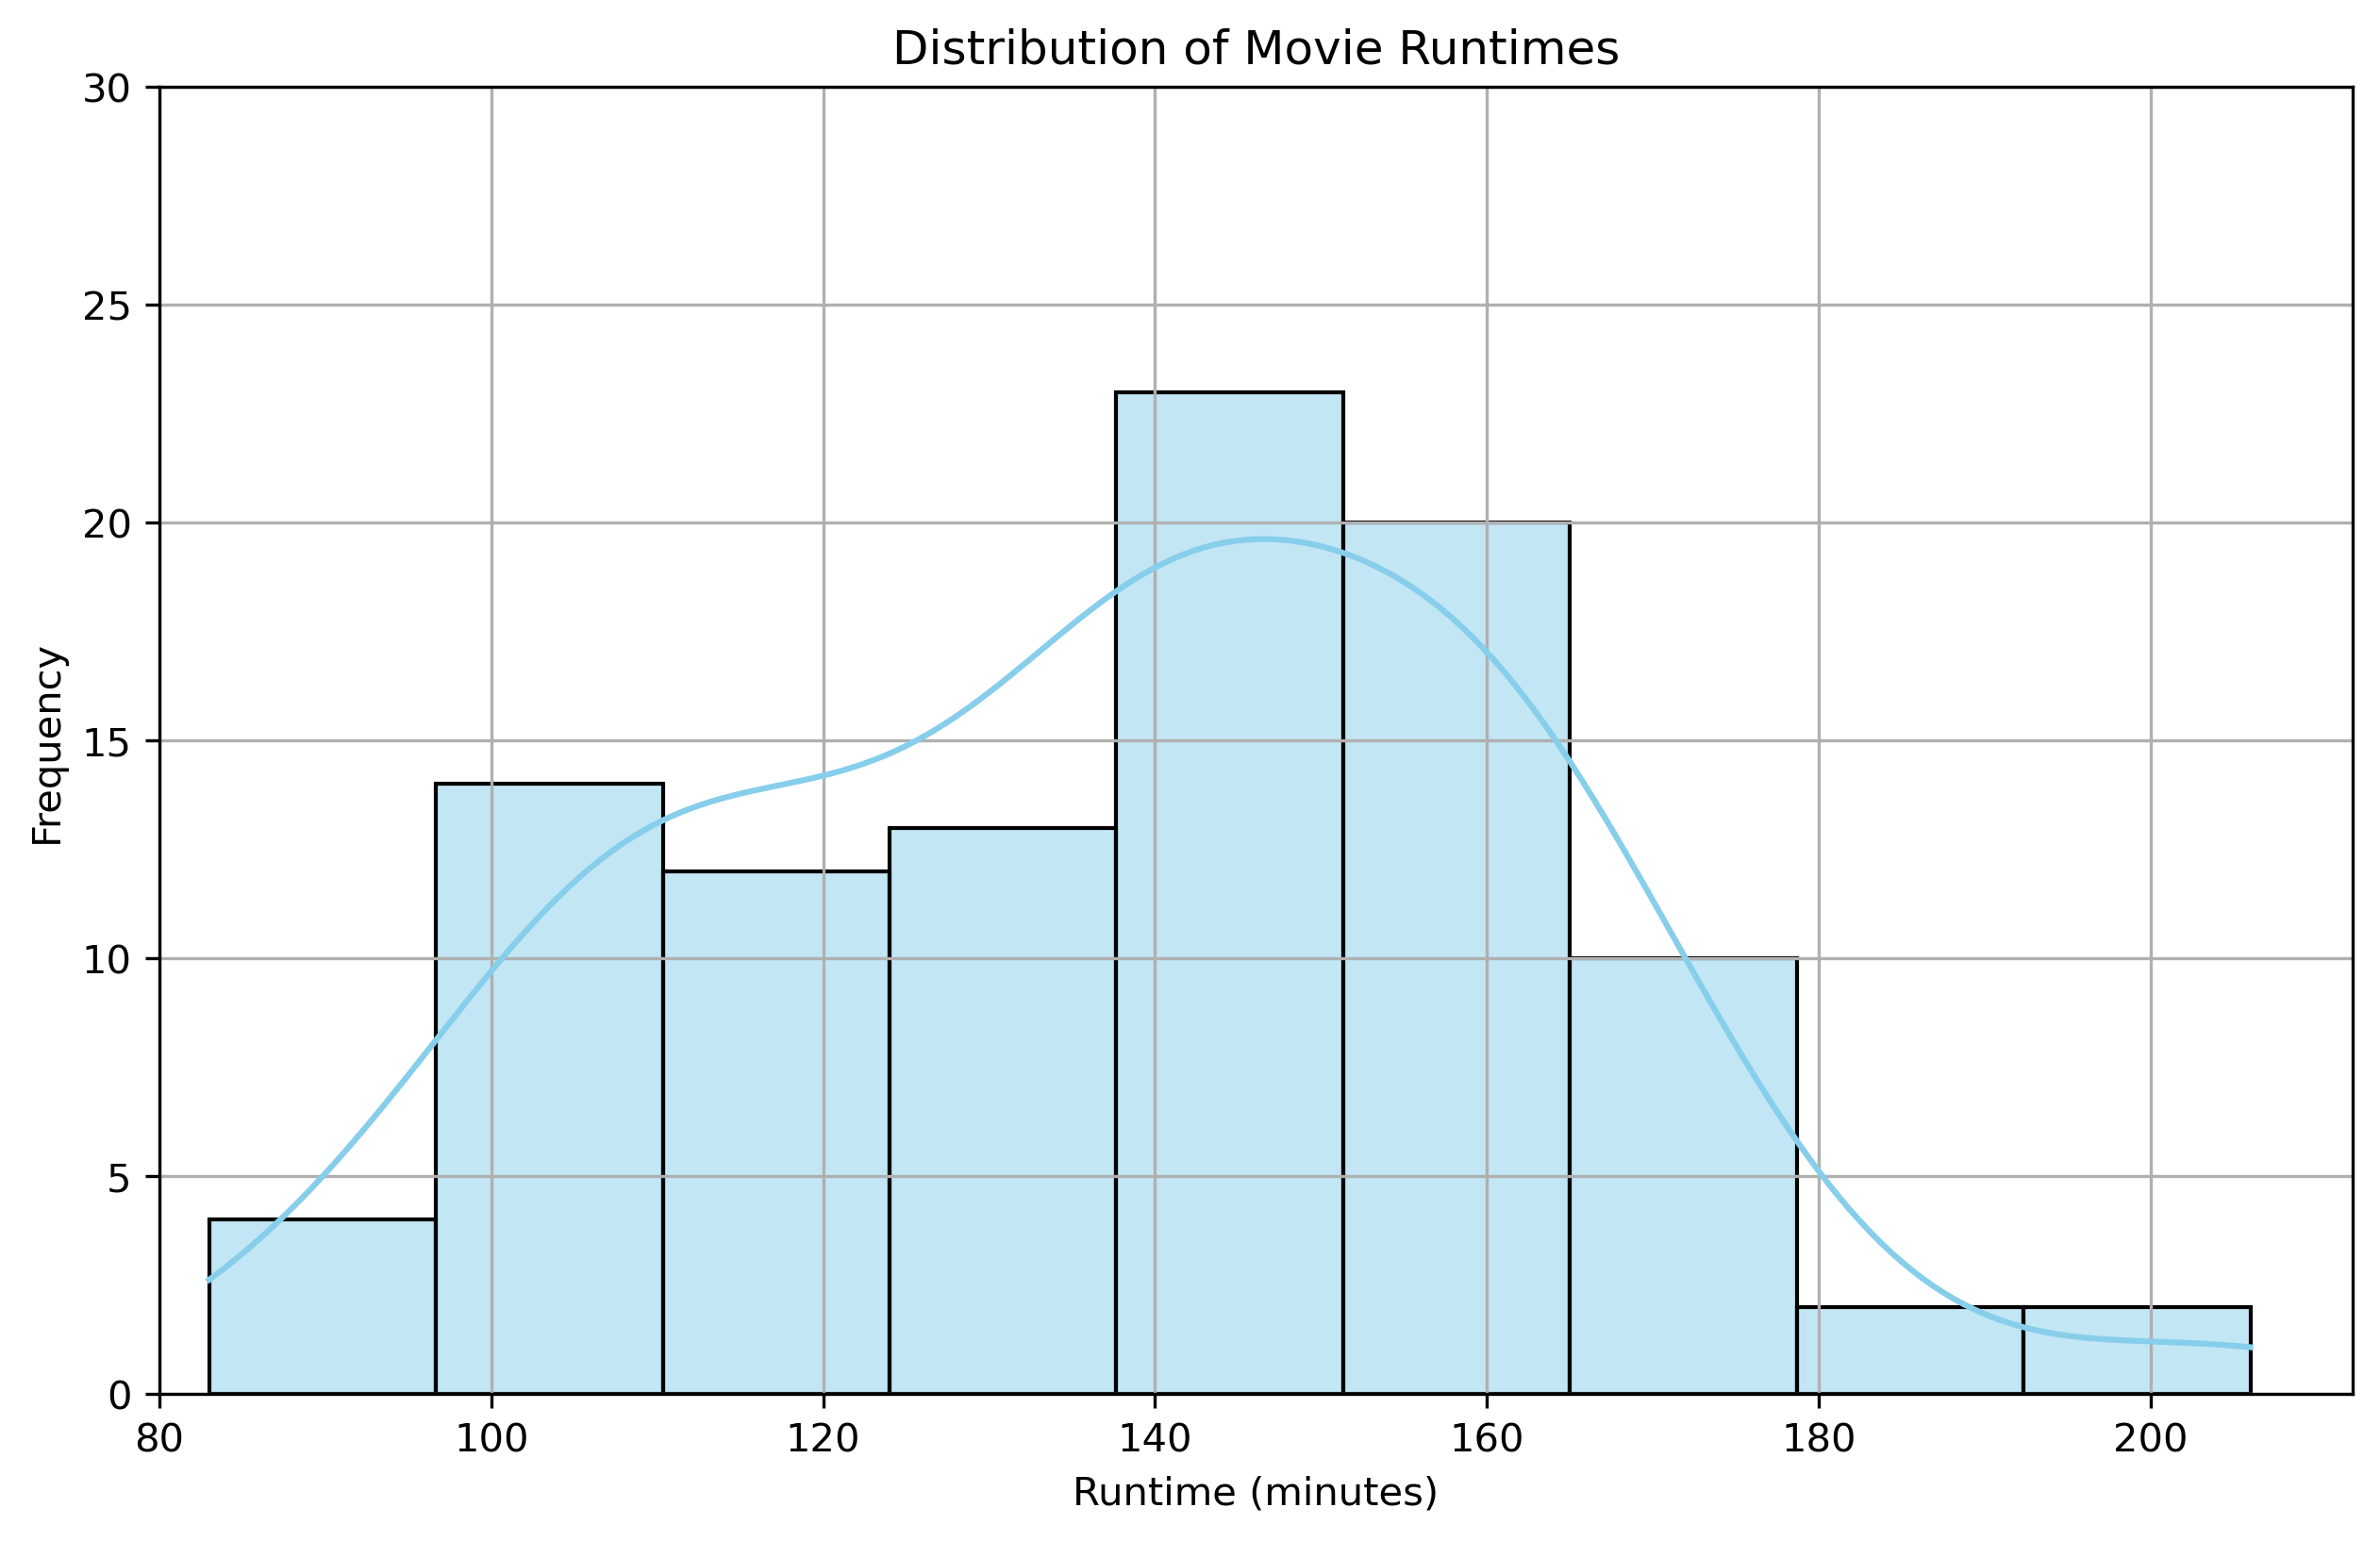

In [50]:
# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Create a histogram to visualize the distribution of movie runtimes
# Filtering data for movies only, using final_data['Type']=='Movie']
# Set kde=True for kernel density estimation to add a smooth line representing the distribution
sns.histplot(final_data['Runtime_minutes'][final_data['Type']=='Movie'], kde=True, bins=9, color='skyblue', edgecolor='black')

# Set title for the plot
plt.title('Distribution of Movie Runtimes')

# Set labels for x and y axes
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# Set limits for y-axis from 0 to 15 for better visualization
plt.ylim(0,30)
plt.xlim(80)

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()

**The histogram shows that most movies fall between 120 and 160 minutes long. 
There are also a fair number of movies that are shorter than 120 minutes or longer than 160 minutes, but not nearly as many. This suggests that the distribution of movie runtimes is skewed to the right.
The Peak of KDE show the mean which is around 130 to 160 minutes.**

## Average Runtime for Shows per Episode

In [52]:
# Calculate total seconds of only shows runtime
only_show_runtime = final_data['Runtime'][final_data['Runtime'].notnull() & (final_data['Type'] == 'Show')]

total_seconds = sum(t.hour * 3600 + t.minute * 60 for t in only_show_runtime)
 
# Calculate mean seconds
mean_seconds = total_seconds / len(only_show_runtime)

# Convert mean seconds to a timedelta object
mean_time = timedelta(seconds=mean_seconds)

# Convert timedelta to time object
mean_time = time(hour=mean_time.seconds // 3600, minute=(mean_time.seconds % 3600) // 60)

# Print the mean time
print("Mean time:", mean_time)

Mean time: 00:44:00


**The average runtime of shows per episode in the dataset was found to be approximately 44 minutes. This indicates that shows tend to have a standard duration, aligning with audience preferences for a typical viewing experience.**

### Show runtime Visual

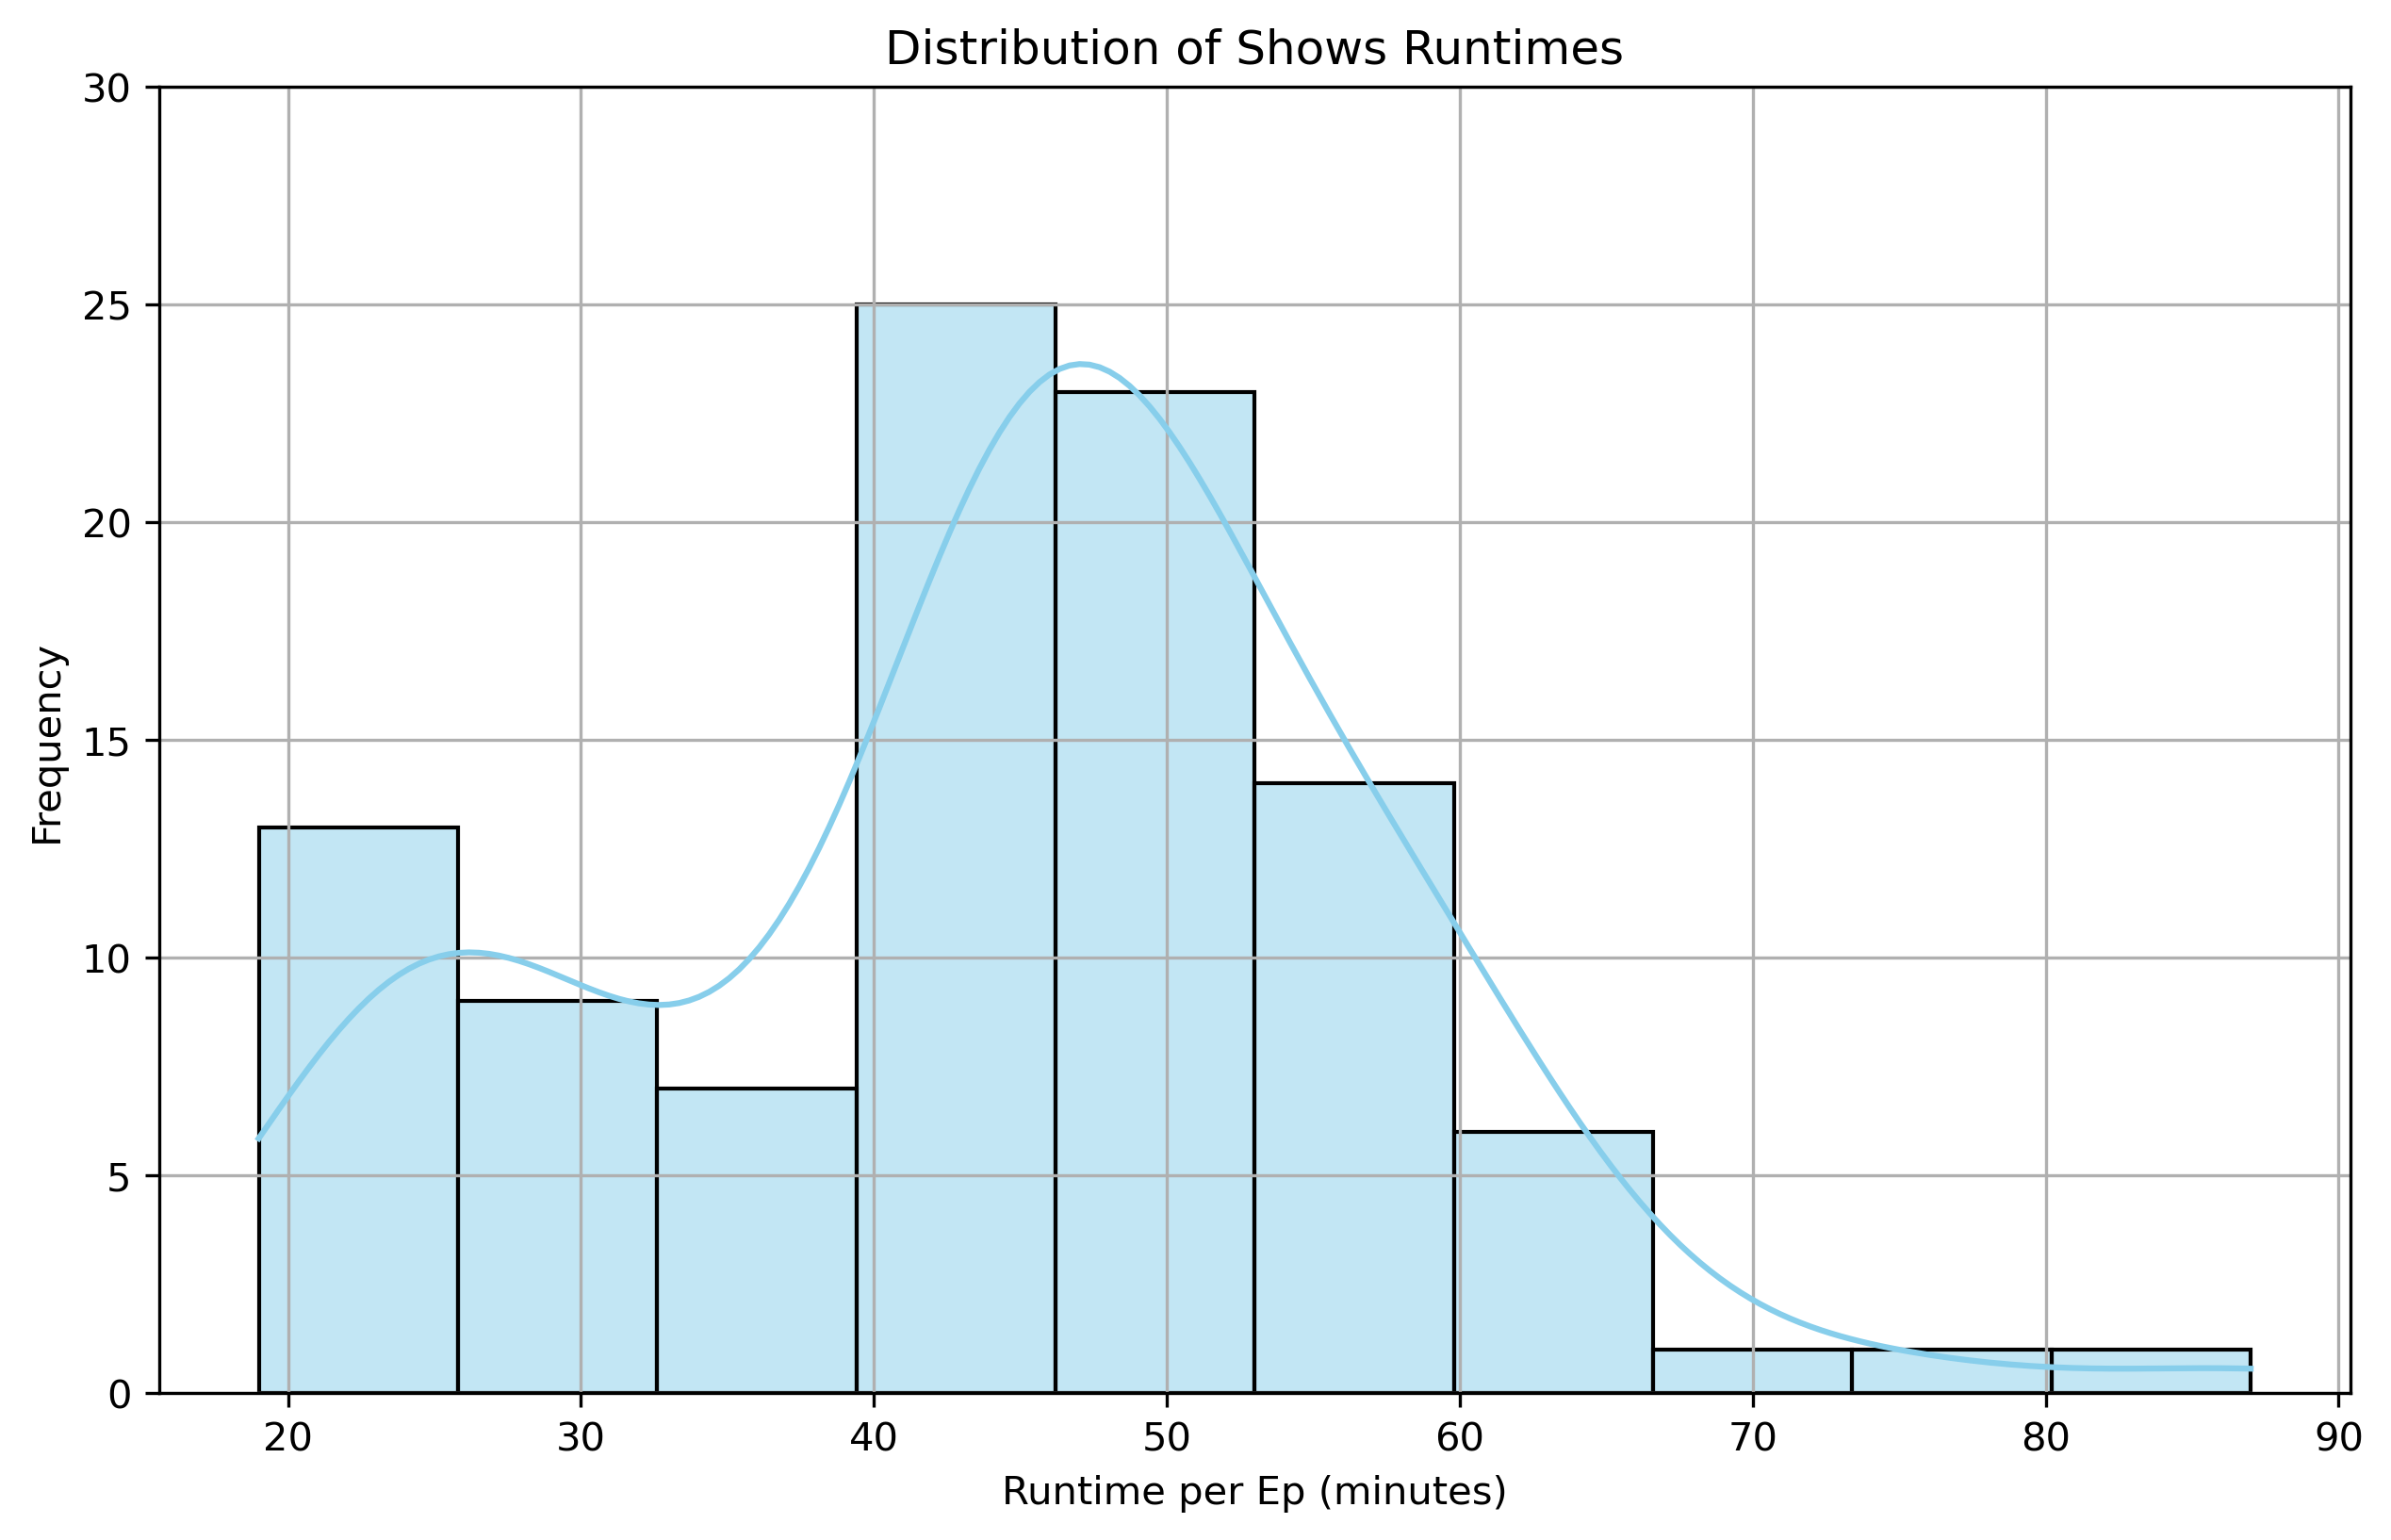

In [54]:
# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Create a histogram to visualize the distribution of movie runtimes
# Filtering data for movies only, using final_data['Type']=='Show']
# Set kde=True for kernel density estimation to add a smooth line representing the distribution
sns.histplot(final_data['Runtime_minutes'][final_data['Type']=='Show'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Set title for the plot
plt.title('Distribution of Shows Runtimes')

# Set labels for x and y axes
plt.xlabel('Runtime per Ep (minutes)')
plt.ylabel('Frequency')

# Set limits for y-axis from 0 to 15 for better visualization
plt.ylim(0,30)

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()

**The histogram shows that most runtime per episodes of show fall between 40 and 60 minutes long. 
There are also a fair number of movies that are shorter than 40 minutes or longer than 60 minutes, but not nearly as many. This suggests that the distribution of show runtimes is skewed to the right.
The Peak of KDE show the mean which is around 40 to 60 minutes.**

## MEAN IMDB RATING FOR MOVIE AND SHOW

In [55]:
# Grouping the 'final_data' DataFrame by the 'Type' column and calculating the mean of the 'imdb_rating' column for each group.
mean_rating = final_data.groupby('Type')['imdb_rating'].mean()

# Printing the mean ratings for each 'Type'.
print(mean_rating)

Type
Movie    7.111340
Show     7.869388
Name: imdb_rating, dtype: float64


**The analysis reveals that on average, shows tend to have a slightly higher IMDb rating (7.86) compared to movies (7.11). This suggests that viewers generally perceive shows more favorably than movies, as indicated by their IMDb ratings.**

## Analyzing Top Genres

In [56]:
# Extract individual genres, strip whitespace, and count occurrences to find top genres.
value_count_genre = final_data['Genre'].explode().str.strip().value_counts()

#Printing Top Genres.
print(value_count_genre)

Genre
Drama                 146
Action & Adventure     92
Mystery & Thriller     86
Crime                  56
Comedy                 55
Science-Fiction        48
Fantasy                37
Romance                23
Kids & Family          18
Animation              15
History                14
Horror                 13
War & Military         11
Made in Europe          6
Western                 3
Documentary             3
Sport                   2
Reality TV              1
Music & Musical         1
Name: count, dtype: int64


In [57]:
# Resetting index to convert the Series into a DataFrame with 'Genre' and 'count' columns
df = pd.DataFrame(value_count_genre).reset_index()

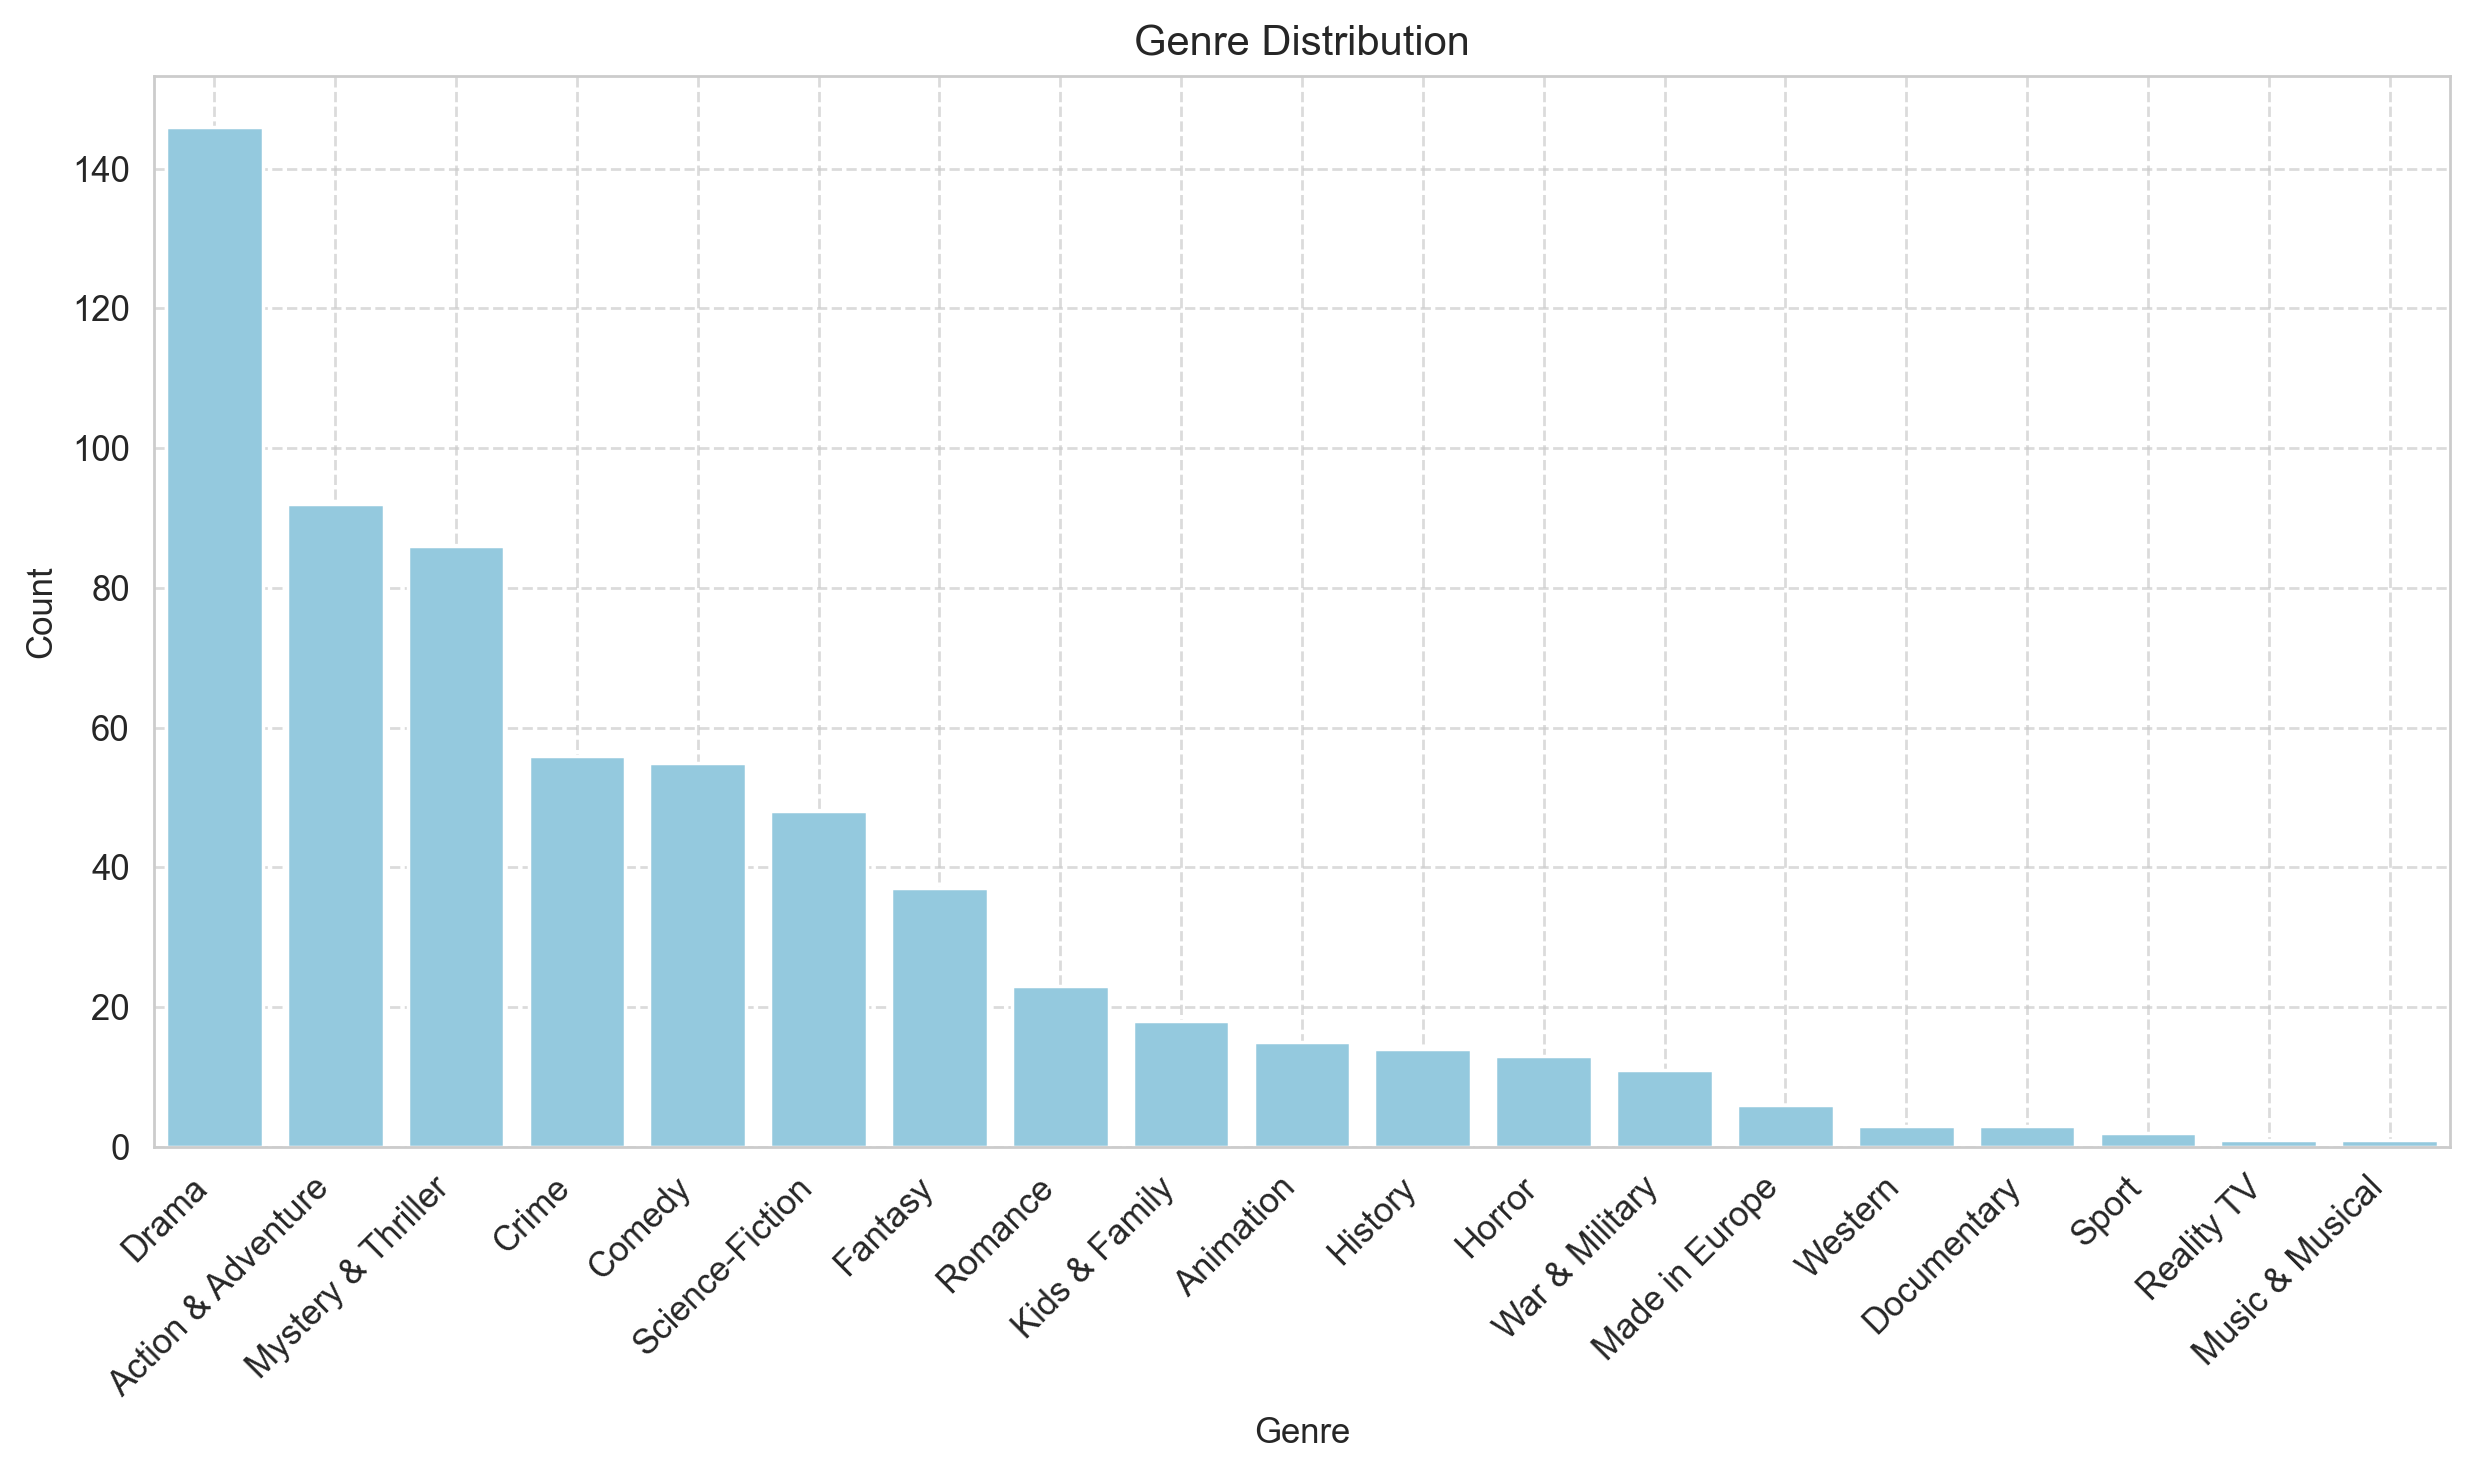

In [58]:
# Create bar plot
plt.figure(figsize=(10, 6), dpi=250)

# Set the style
sns.set_style("whitegrid")

# Plot the barplot
sns.barplot(x=df['Genre'], y=df['count'], color='skyblue')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')

# Add grid lines only on the y-axis
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

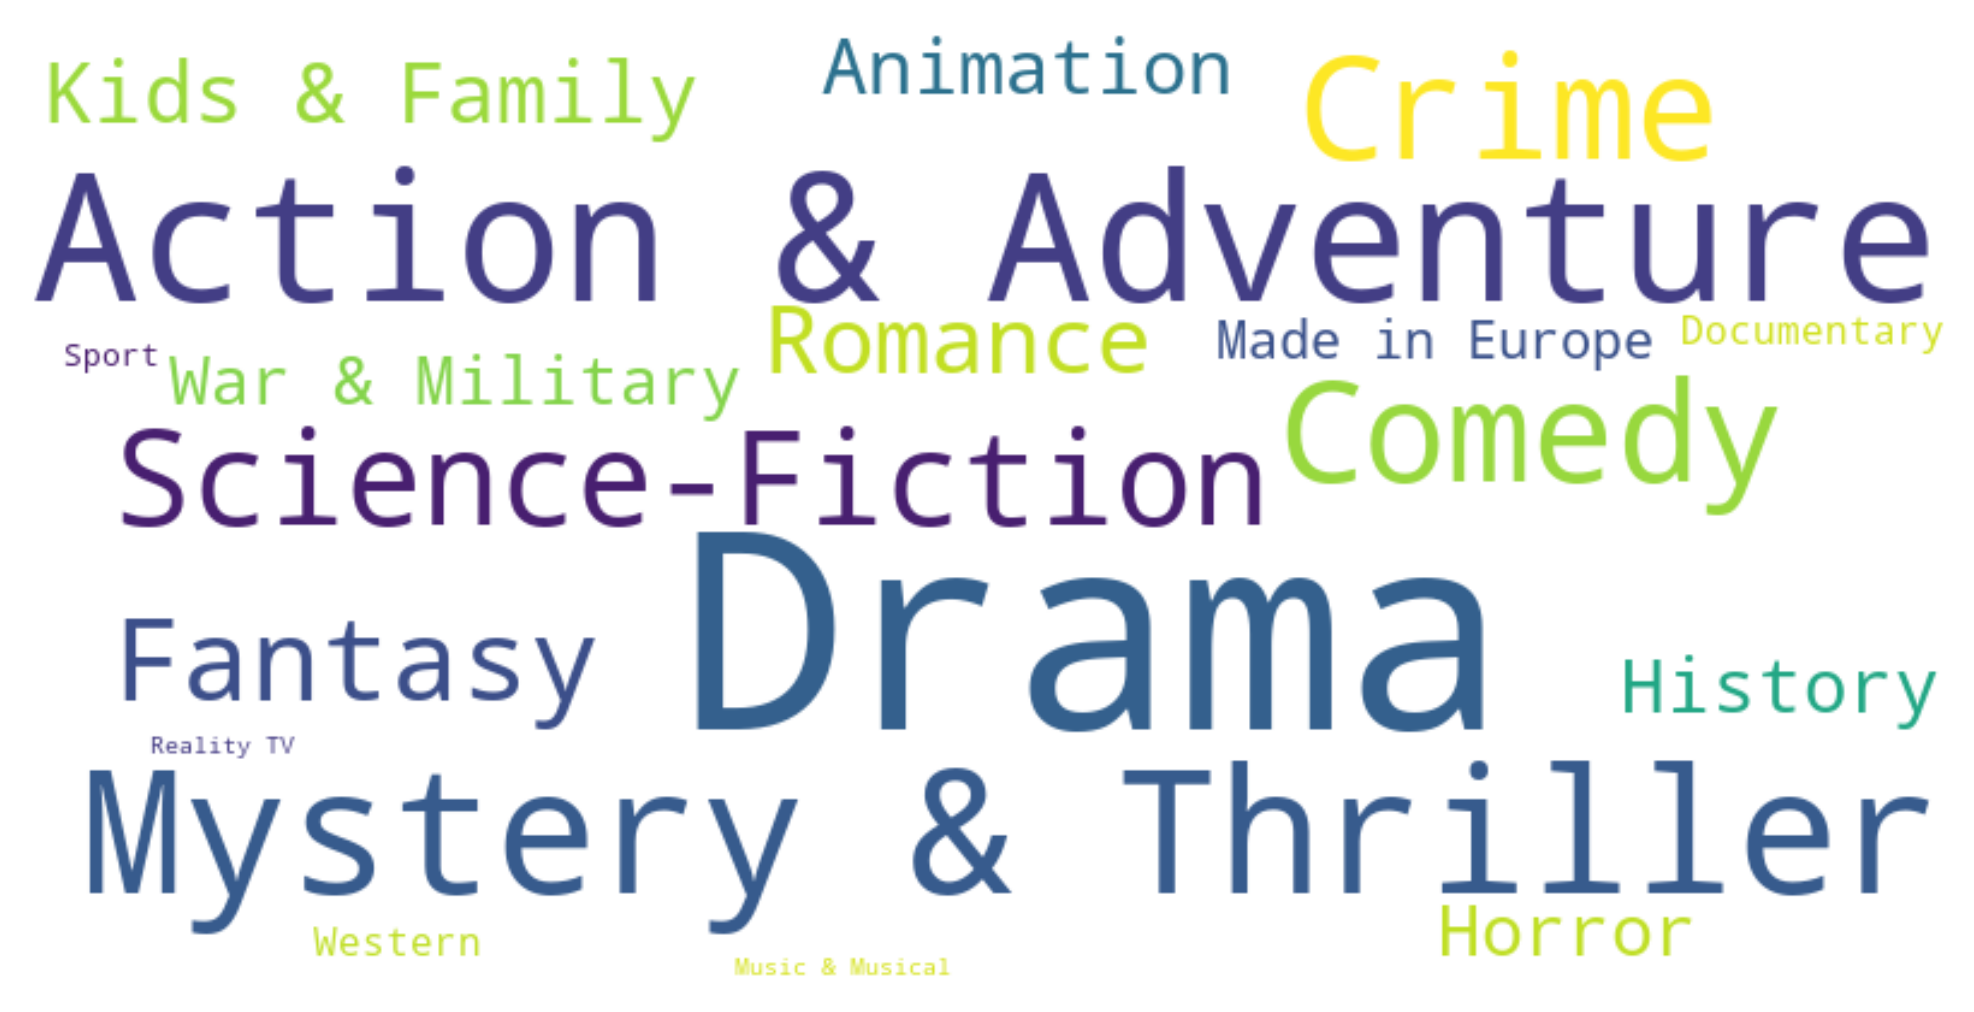

In [59]:
#Importing Relevent Library.
from wordcloud import WordCloud

# Generate word cloud from genre frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_count_genre)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Based on the output provided, it appears to be a distribution of movie genres with their respective counts.

**Here's a conclusion drawn from the data:**

**Most Common Genres:** The top genres by count are **Drama (146)**, followed by **Action & Adventure (93), and Mystery & Thriller (86).** This indicates that these genres are quite popular among the sampled movies.

**Variety of Genres:** The list includes a diverse range of genres, such as **Crime, Comedy, Science-Fiction, Fantasy, Romance, and more.** This suggests a variety of options for viewers with different preferences.

**Less Common Genres:** Some genres have relatively lower counts, such as **Western (3), Documentary (3), Sport (2), Music & Musical (1), and Reality TV (1).** This indicates that these genres might be less frequently produced or less popular among the sampled movies.

**Specialized Genres:** Genres like War & Military, Made in Europe, and Animation cater to specific interests or demographics. They have lower counts compared to more mainstream genres but still represent a segment of the movie market.

**Absence of Some Genres:** Notably, there might be some genres absent from this list, such as Thriller, Adventure, or Horror. This could suggest either they are not represented in the sampled data or have been grouped under broader categories like Mystery & Thriller or Action & Adventure.
Overall, this distribution provides insights into the popularity and diversity of movie genres within the sampled dataset.

## Average Mean Rating For Genres

In [60]:
# Drop rows with missing values in the 'Genre' column
genre = final_data.dropna(subset=['Genre'])

In [61]:
# Create a DataFrame for genres ratings
genre_rating_df = pd.DataFrame({
    # Extract individual streaming services from the 'Genre' column
    'Genres': [genre for genres in genre['Genre'] for genre in genres],
     # Repeat IMDb ratings for each Genre based on the number of occurrences
    'Rating': genre['imdb_rating'].repeat(genre['Genre'].apply(len))
})
genre_rating_df['Genres'] = genre_rating_df['Genres'].str.strip()

In [62]:
# Group by streaming service and calculate the mean rating
mean_rating_genre = genre_rating_df.groupby('Genres').mean().sort_values('Rating', ascending=False) # Sort the DataFrame based on mean rating in descending order

print(mean_rating_genre)

                      Rating
Genres                      
Animation           8.350000
Music & Musical     8.000000
Horror              7.969231
Science-Fiction     7.725532
Fantasy             7.716667
Drama               7.669930
Comedy              7.641509
History             7.578571
Western             7.566667
Made in Europe      7.483333
War & Military      7.463636
Crime               7.452727
Kids & Family       7.412500
Documentary         7.366667
Action & Adventure  7.360000
Mystery & Thriller  7.312791
Romance             7.308696
Sport               6.750000
Reality TV          3.700000


In [63]:
df_genre_rating = pd.DataFrame(mean_rating_genre).reset_index()

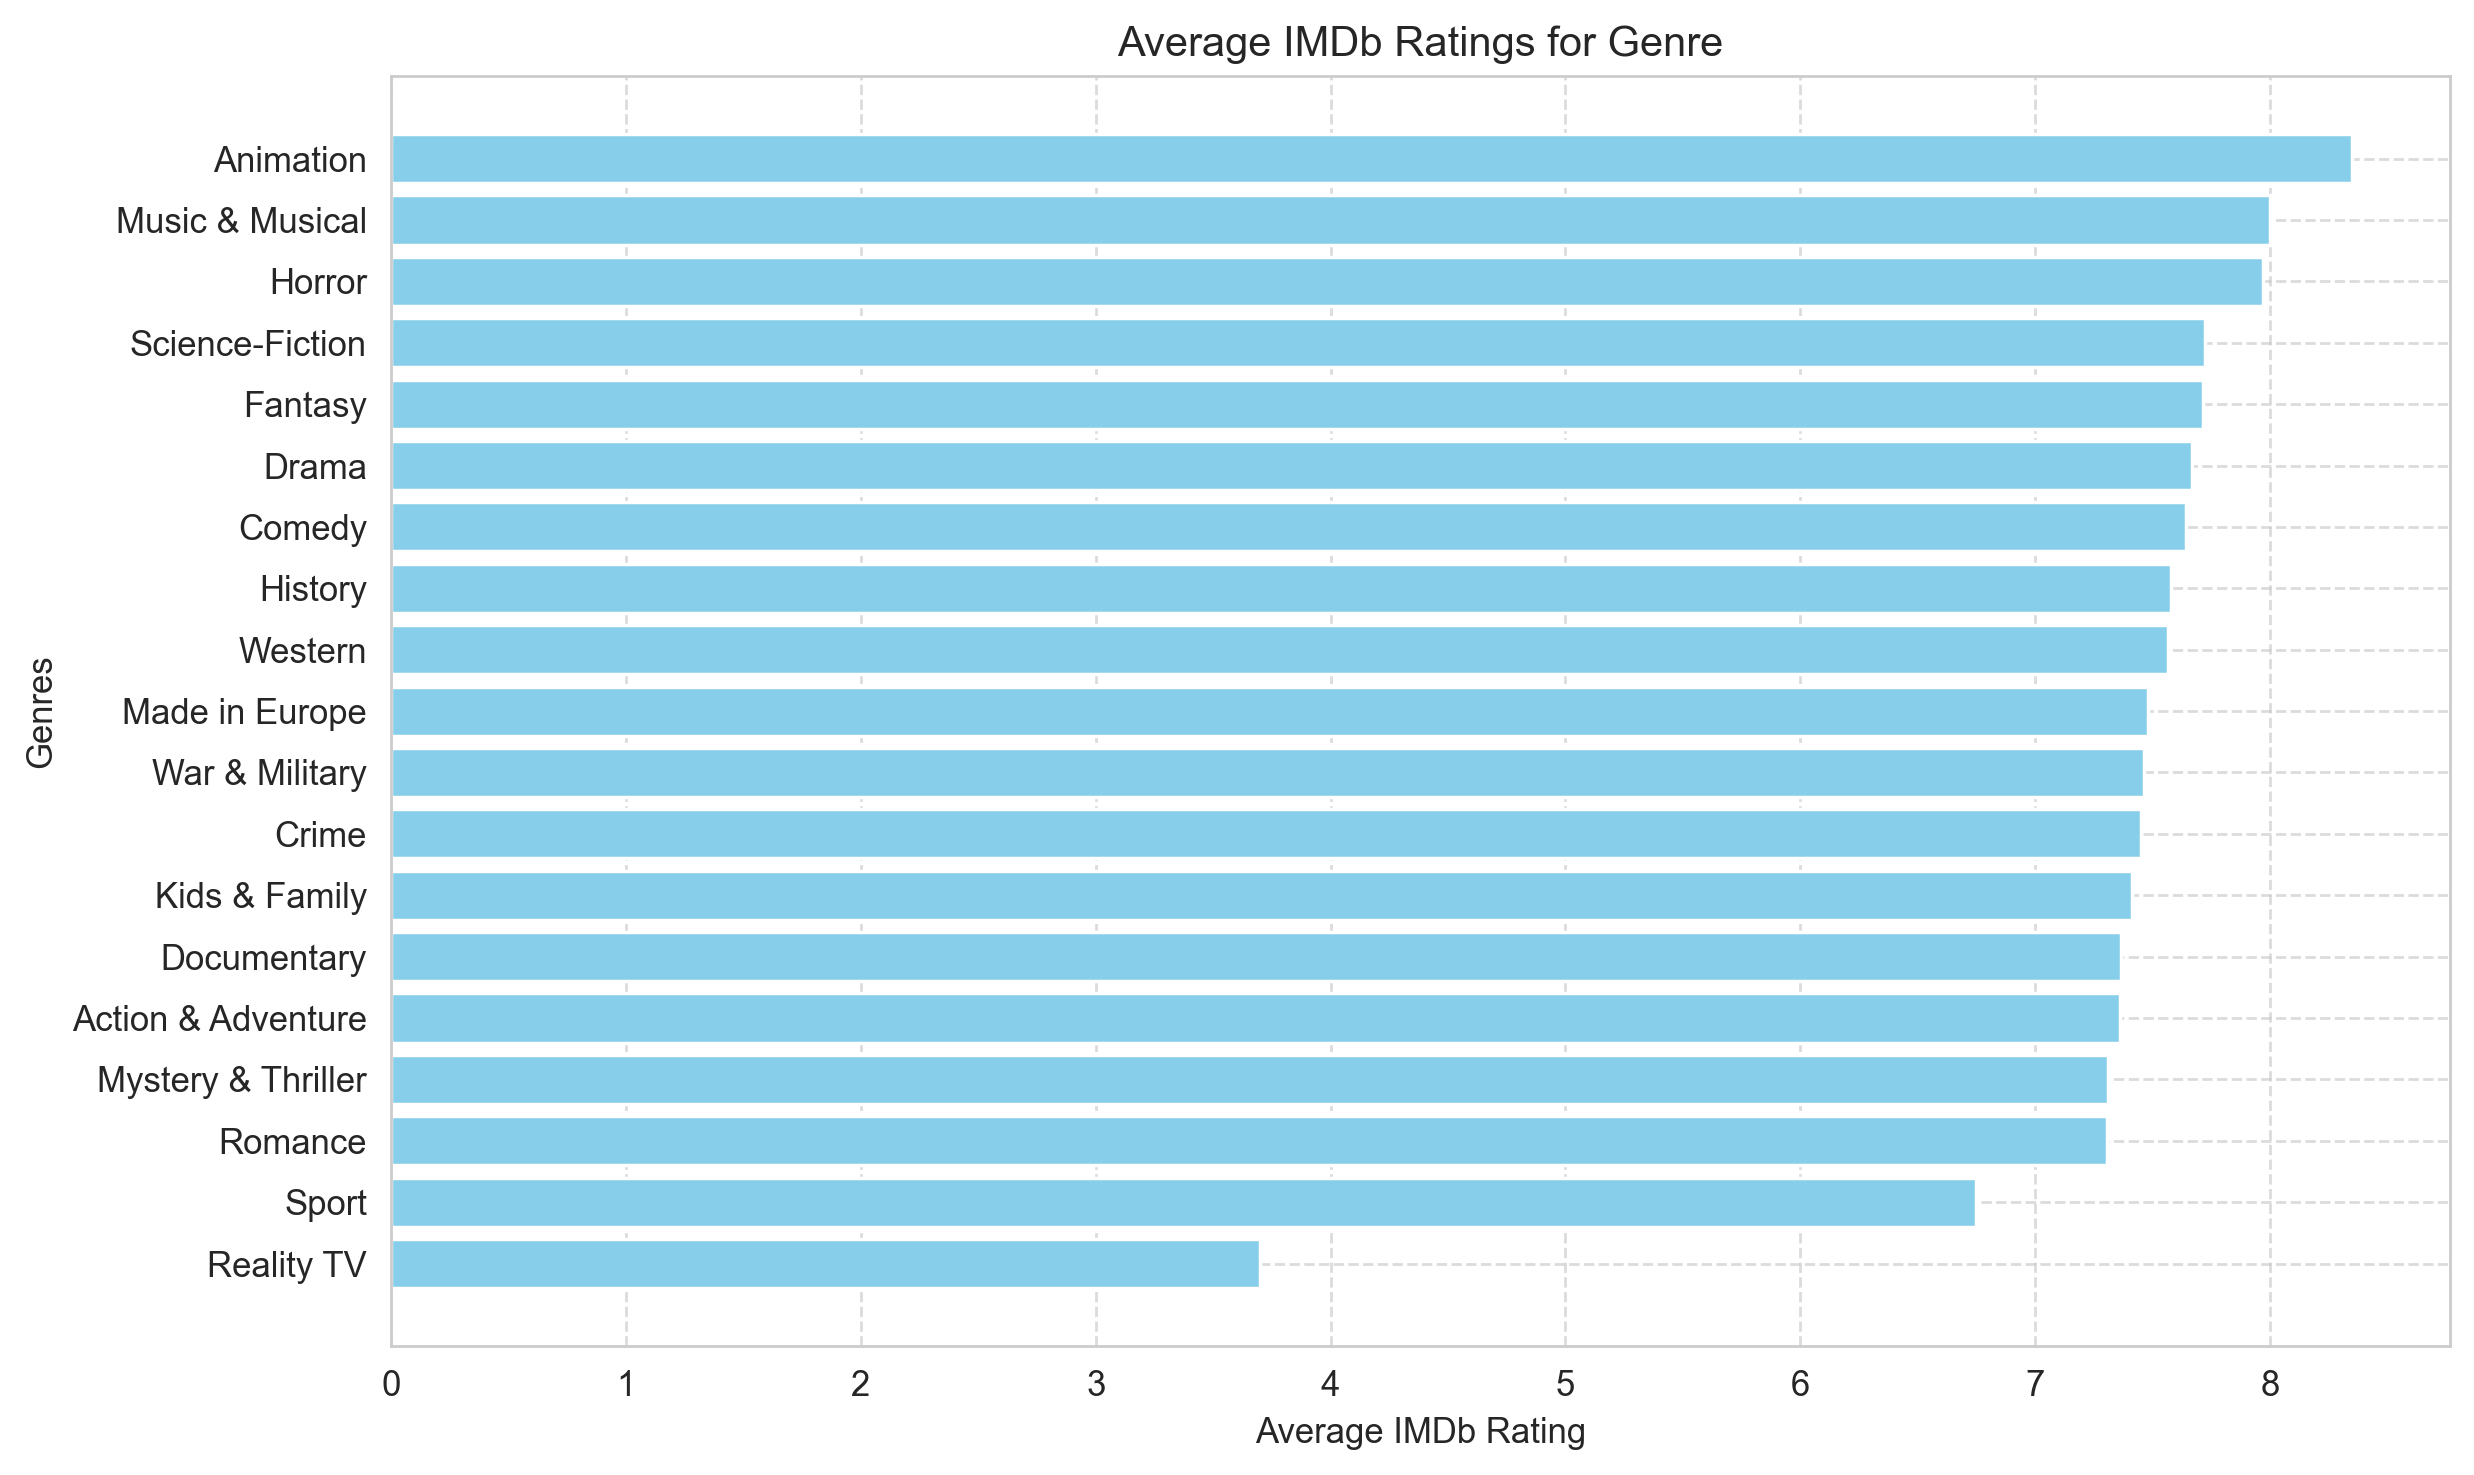

In [64]:
# Plot stream service and imdb rating.
plt.figure(figsize=(10, 6), dpi=250)

# Set the style
sns.set_style("whitegrid")

#plot horizontal bar plot
plt.barh('Genres', 'Rating', data = df_genre_rating, color='skyblue')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genres')
plt.title('Average IMDb Ratings for Genre')

# Add grid lines only on the y-axis
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Invert y-axis to display highest rating at the top
plt.gca().invert_yaxis() 

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.grid(True)
plt.show()

**Insights from Genre-Specific Ratings:**

**Top-Rated Genres:** Animation, Music & Musical, and Horror consistently lead with high average ratings (8.35, 8.0, and 7.97 respectively), reflecting significant popularity and engagement among audiences.

**Quality Disparities:** Conversely, genres like Reality TV exhibit lower average ratings (3.7), indicating potential challenges in delivering compelling content that resonates with viewers.

**Diverse Audience Preferences:** The broad range of genres reflects diverse audience tastes, emphasizing the importance of catering to varied interests within the entertainment landscape.

**Strategic Implications:** Data-driven insights from genre-specific ratings enable informed decision-making for content creators and distributors, guiding resource allocation and market positioning to maximize audience engagement and industry competitiveness.

This conclusion succinctly integrates the average ratings of each genre, providing a comprehensive overview of the insights derived from the genre-specific rating.

## FInding Predominant Stream Service

In [65]:
# Extract individual Stream Service, strip whitespace, and count occurrences to find top Stream Service.
value_stream_service = final_data['Stream_Service'].explode().str.strip().value_counts()

#Printing Top Stream Service.
print(value_stream_service)

Stream_Service
Netflix                            53
Amazon Prime Video                 44
Hotstar                            21
Jio Cinema                         18
Sony Liv                            9
Zee5                                7
Lionsgate Play                      7
Apple TV Plus                       6
Crunchyroll                         6
Lionsgate Play Apple TV Channel     5
Lionsgate Play Amazon Channel       5
Alt Balaji                          2
VI movies and tv                    2
Sun Nxt                             2
MX Player                           1
Amazon miniTV                       1
aha                                 1
Name: count, dtype: int64


In [66]:
# Resetting index to convert the Series into a DataFrame with 'Stream_Service' and 'count' columns
df_stream = pd.DataFrame(value_stream_service).reset_index()
df_stream

,Stream_Service,count
0,Netflix,53
1,Amazon Prime Video,44
2,Hotstar,21
3,Jio Cinema,18
4,Sony Liv,9
5,Zee5,7
6,Lionsgate Play,7
7,Apple TV Plus,6
8,Crunchyroll,6
9,Lionsgate Play Apple TV Channel,5


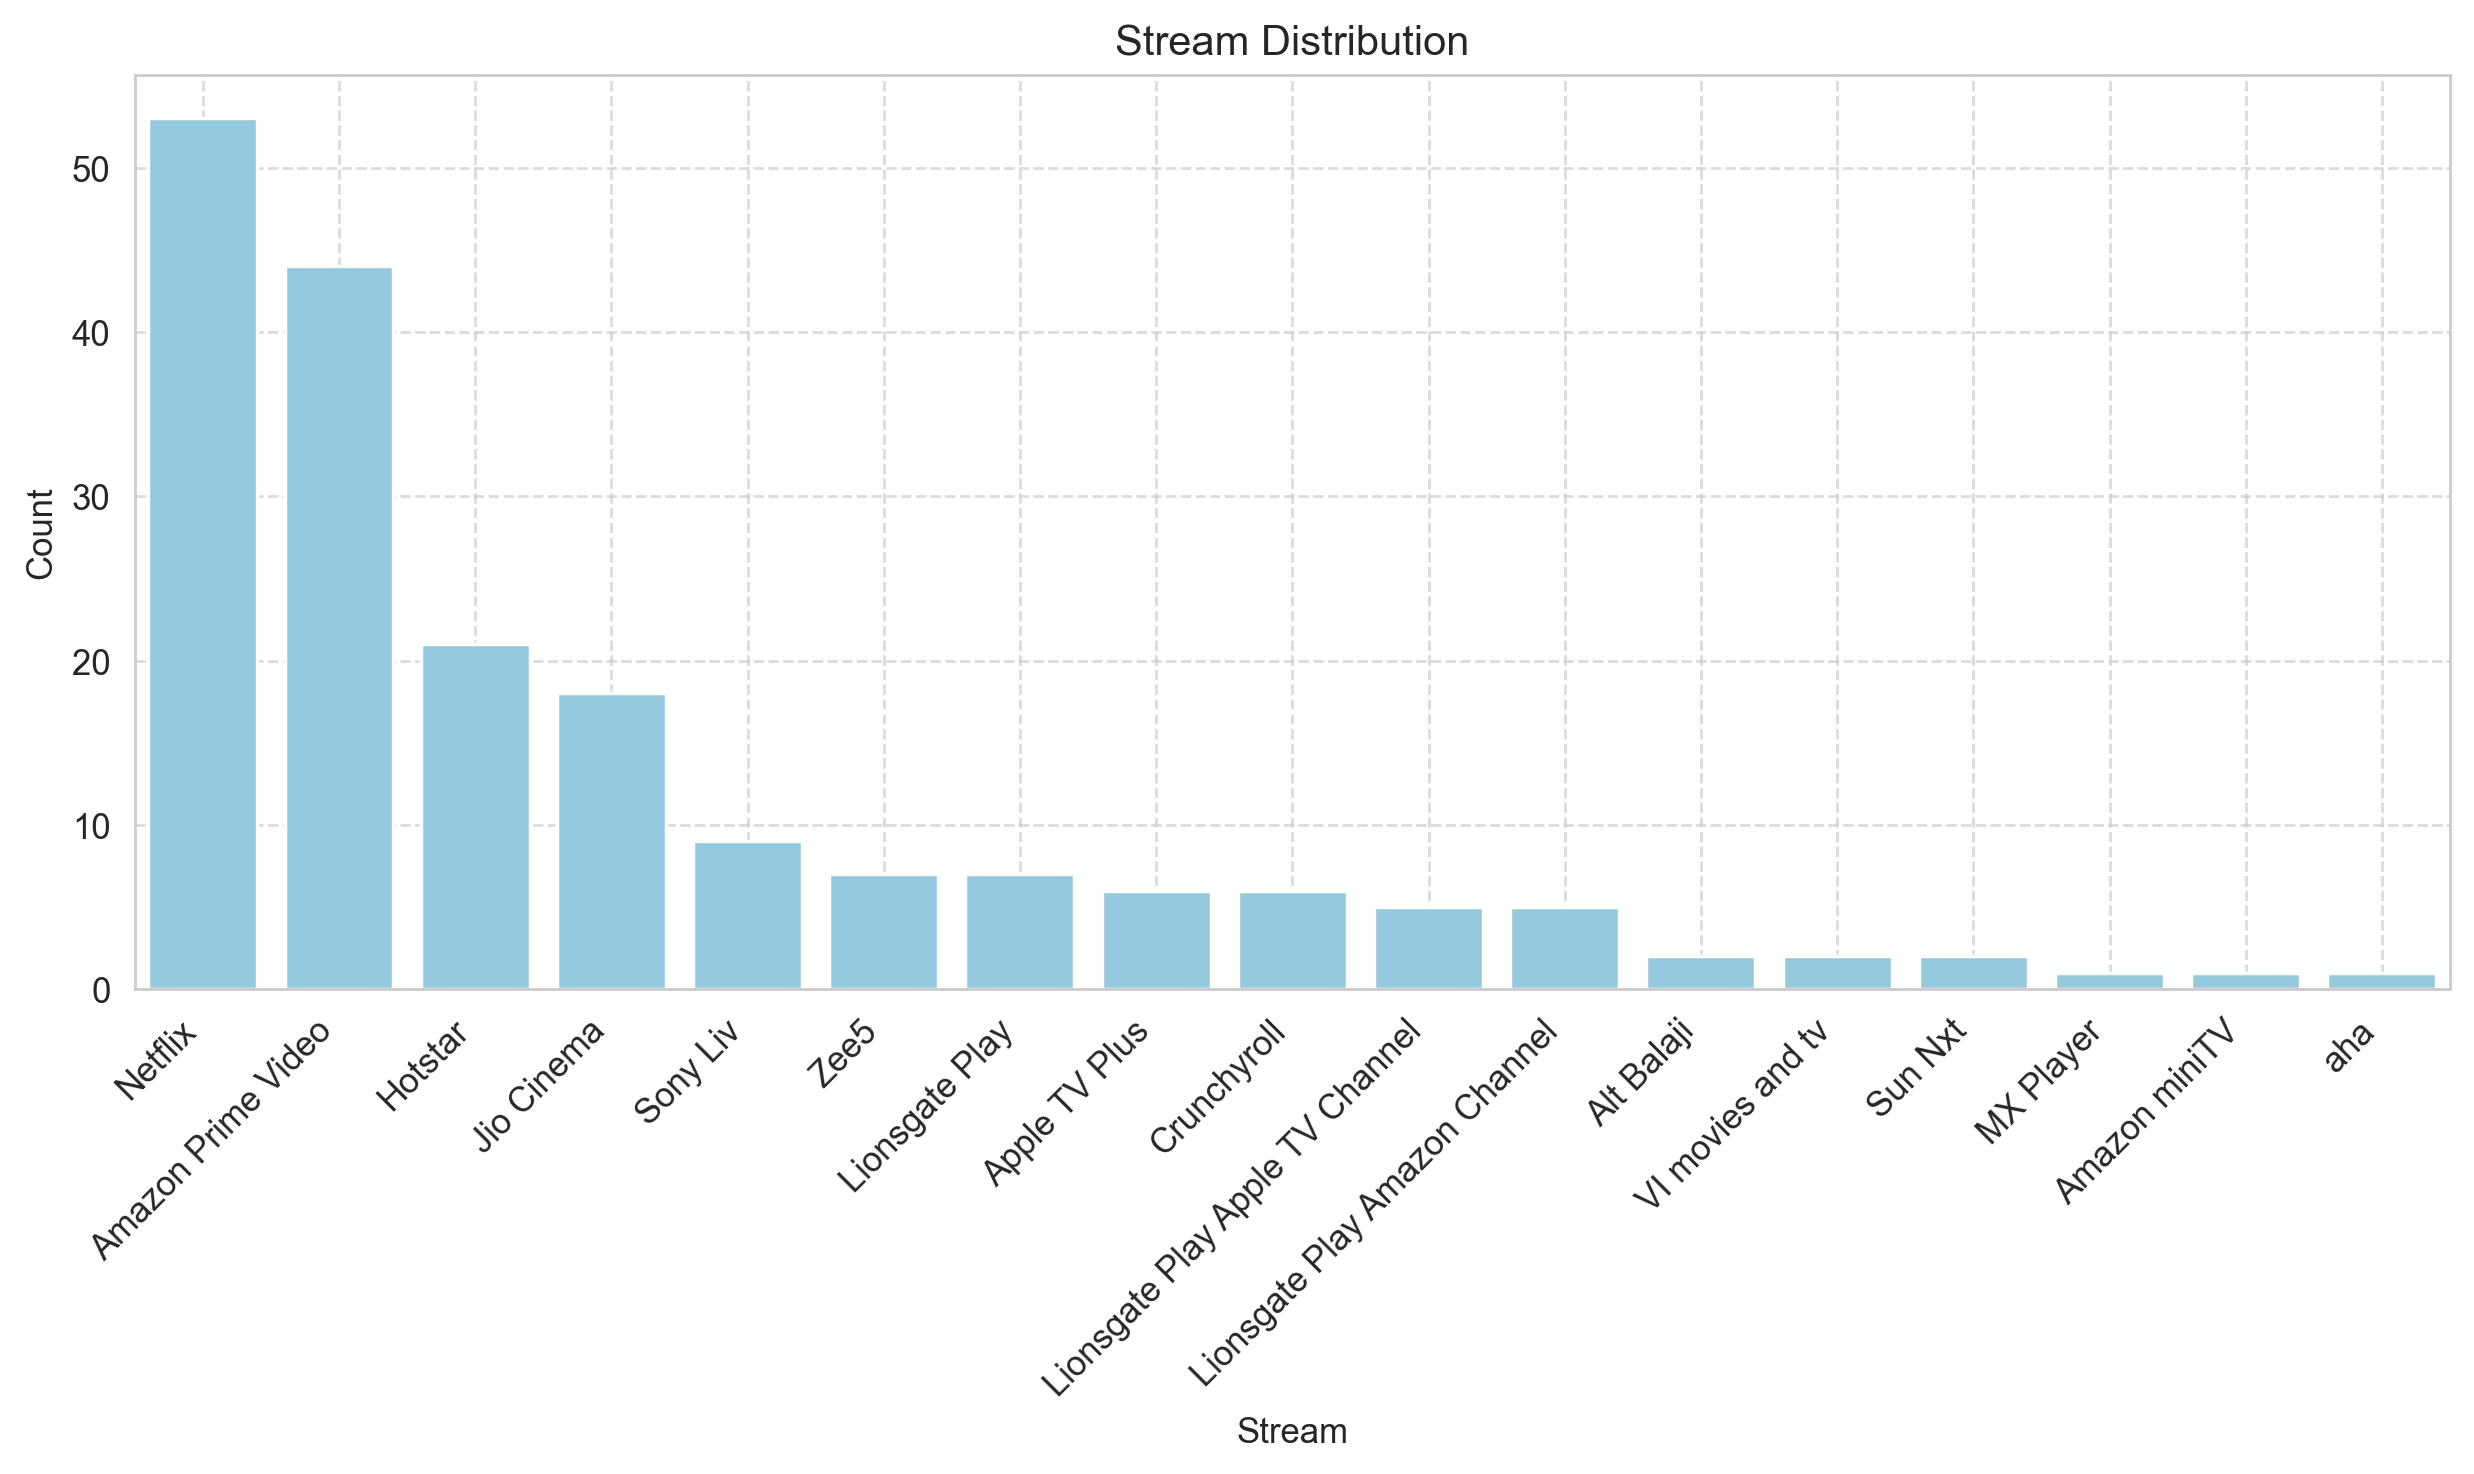

In [67]:
# Create bar plot
plt.figure(figsize=(10, 6), dpi=250)

# Set the style
sns.set_style("whitegrid")

# Plot the barplot
sns.barplot(x='Stream_Service', y='count', data=df_stream, color='skyblue')

# Set labels and title
plt.xlabel('Stream')
plt.ylabel('Count')
plt.title('Stream Distribution')

# Add grid lines only on the y-axis
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

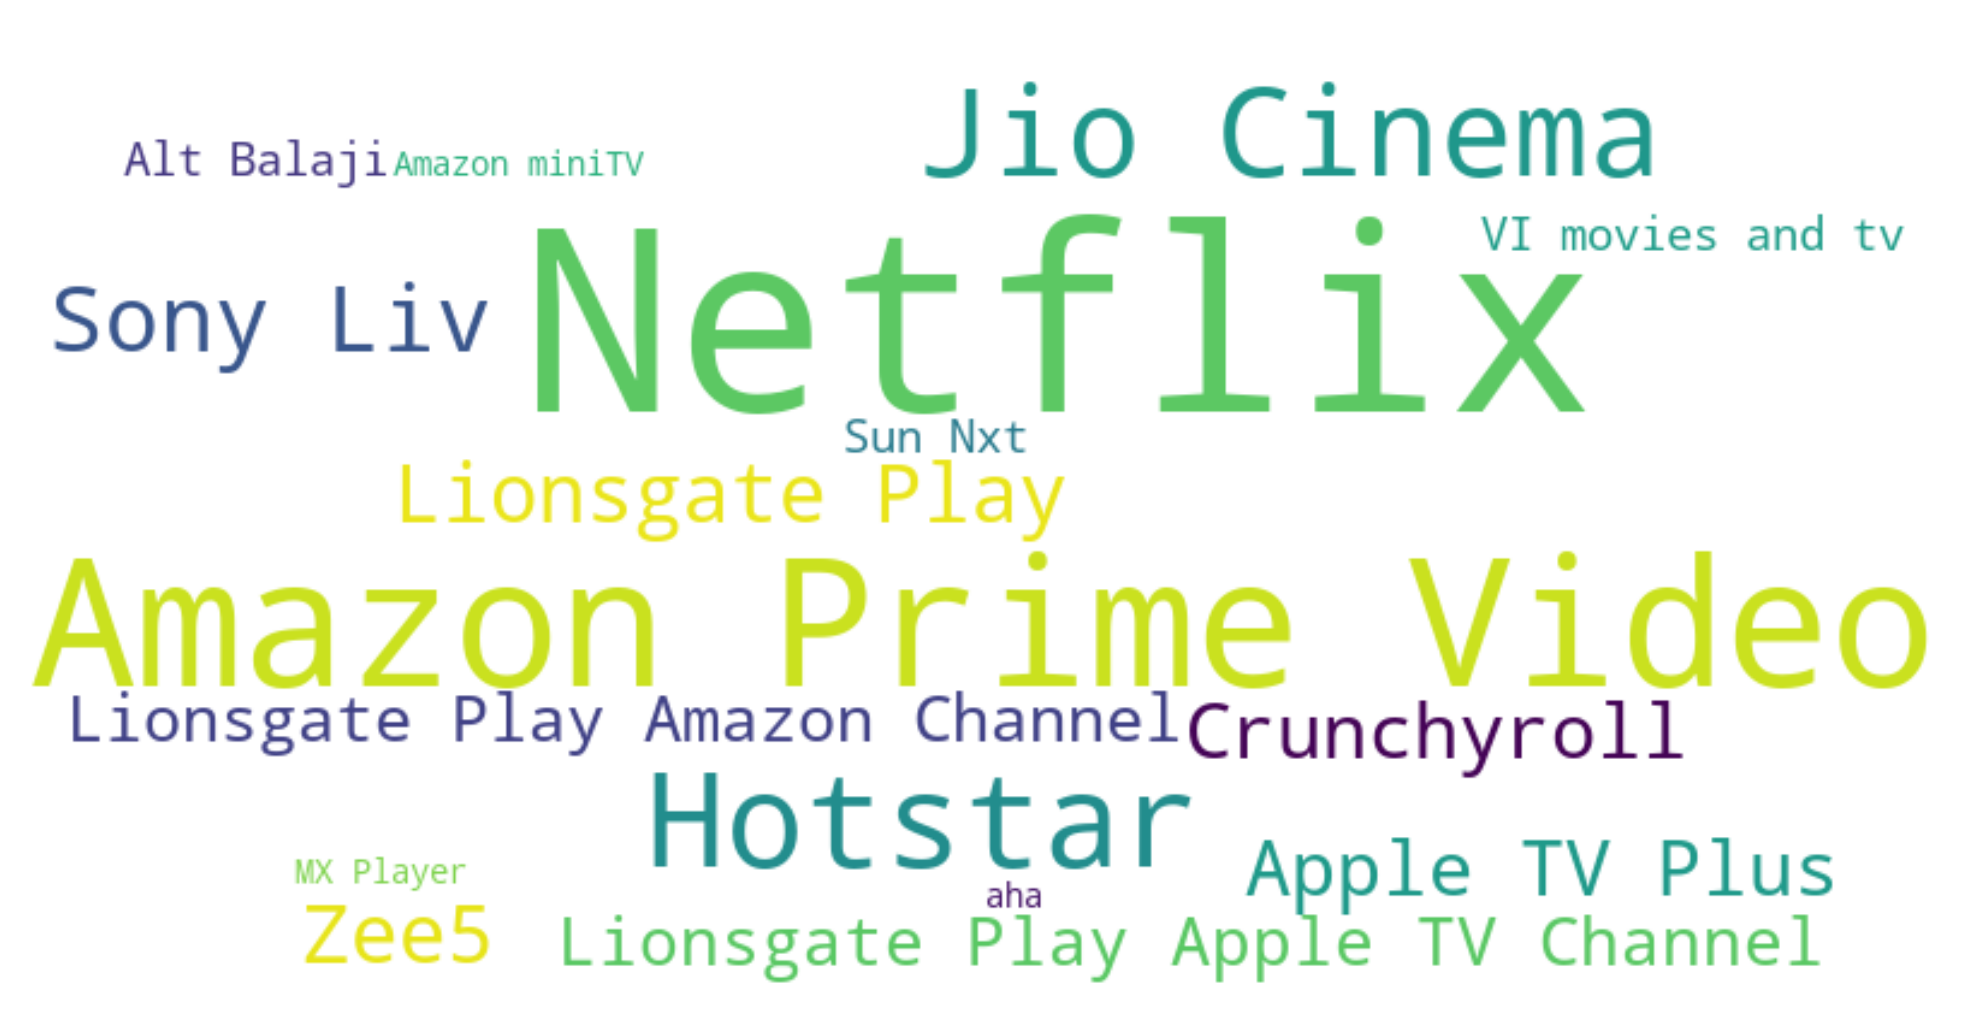

In [68]:
# Generate word cloud from genre frequencies
wordcloud_stream = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_stream_service)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud_stream, interpolation='bilinear')
plt.axis('off')
plt.show()

**Based on the provided output, it appears to be a distribution of streaming services along with the number of occurrences in the dataset.**

**Here's a conclusion drawn from the data:**

**Dominant Streaming Platforms:** Netflix emerges as the most dominant streaming service in the dataset with 53 occurrences, followed closely by Amazon Prime Video with 44 occurrences. This indicates that these two platforms are popular choices among the sampled data.

**Variety of Streaming Options:** The list includes a diverse range of streaming services, including Hotstar, Jio Cinema, Sony Liv, Zee5, and others. This suggests a variety of options available for streaming content among the sampled data.

**Presence of Niche Platforms:** Some platforms like Crunchyroll, Alt Balaji, and aha cater to specific interests such as anime, Indian content, or regional content, respectively. Although they have fewer occurrences compared to mainstream platforms, they still represent a segment of the streaming market.

**Channels Within Platforms:** The presence of channels within platforms, such as Lionsgate Play Apple TV Channel and Lionsgate Play Amazon Channel, suggests partnerships or additional offerings within specific streaming services.

**Lesser-Known Platforms:** Platforms like Sun Nxt, VI movies and tv, and MX Player have relatively lower occurrences, indicating that they might be less popular or have a smaller user base within the sampled dataset.

**Emerging Players:** Some platforms such as Apple TV Plus and Amazon miniTV have a moderate presence, indicating potential growth or emerging popularity in the streaming market.

Overall, this distribution provides insights into the popularity and diversity of streaming services among the sampled dataset, reflecting the landscape of streaming platforms and their varying degrees of prominence.

## AVG Mean Rating for each Streaming service

In [69]:
# Drop rows with missing values in the 'Stream_Service' column
final = final_data.dropna(subset=['Stream_Service'])

In [70]:
# Create a DataFrame for streaming service ratings
stream_rating_df = pd.DataFrame({
    # Extract individual streaming services from the 'Stream_Service' column
    'Stream_Service': [stream for Streams in final['Stream_Service'] for stream in Streams],
     # Repeat IMDb ratings for each streaming service based on the number of occurrences
    'Rating': final['imdb_rating'].repeat(final['Stream_Service'].apply(len))
})

In [71]:
# Group by streaming service and calculate the mean rating
mean_rating = stream_rating_df.groupby('Stream_Service').mean().sort_values('Rating', ascending=False) # Sort the DataFrame based on mean rating in descending order

print(mean_rating)

                                   Rating
Stream_Service                           
Amazon miniTV                    9.200000
Crunchyroll                      8.466667
Sony Liv                         8.150000
Jio Cinema                       8.144444
Lionsgate Play Amazon Channel    7.980000
Lionsgate Play Apple TV Channel  7.980000
Hotstar                          7.866667
Lionsgate Play                   7.771429
VI movies and tv                 7.700000
Netflix                          7.507692
MX Player                        7.400000
Zee5                             7.385714
Amazon Prime Video               7.302273
Apple TV Plus                    7.183333
aha                              6.300000
Sun Nxt                          6.300000
Alt Balaji                       5.850000


In [72]:
# Convert the 'mean_rating' dictionary to a DataFrame and reset index
df_mean_rating = pd.DataFrame(mean_rating).reset_index()

df_mean_rating

,Stream_Service,Rating
0,Amazon miniTV,9.200000
1,Crunchyroll,8.466667
2,Sony Liv,8.150000
3,Jio Cinema,8.144444
4,Lionsgate Play Amazon Channel,7.980000
5,Lionsgate Play Apple TV Channel,7.980000
6,Hotstar,7.866667
7,Lionsgate Play,7.771429
8,VI movies and tv,7.700000
9,Netflix,7.507692


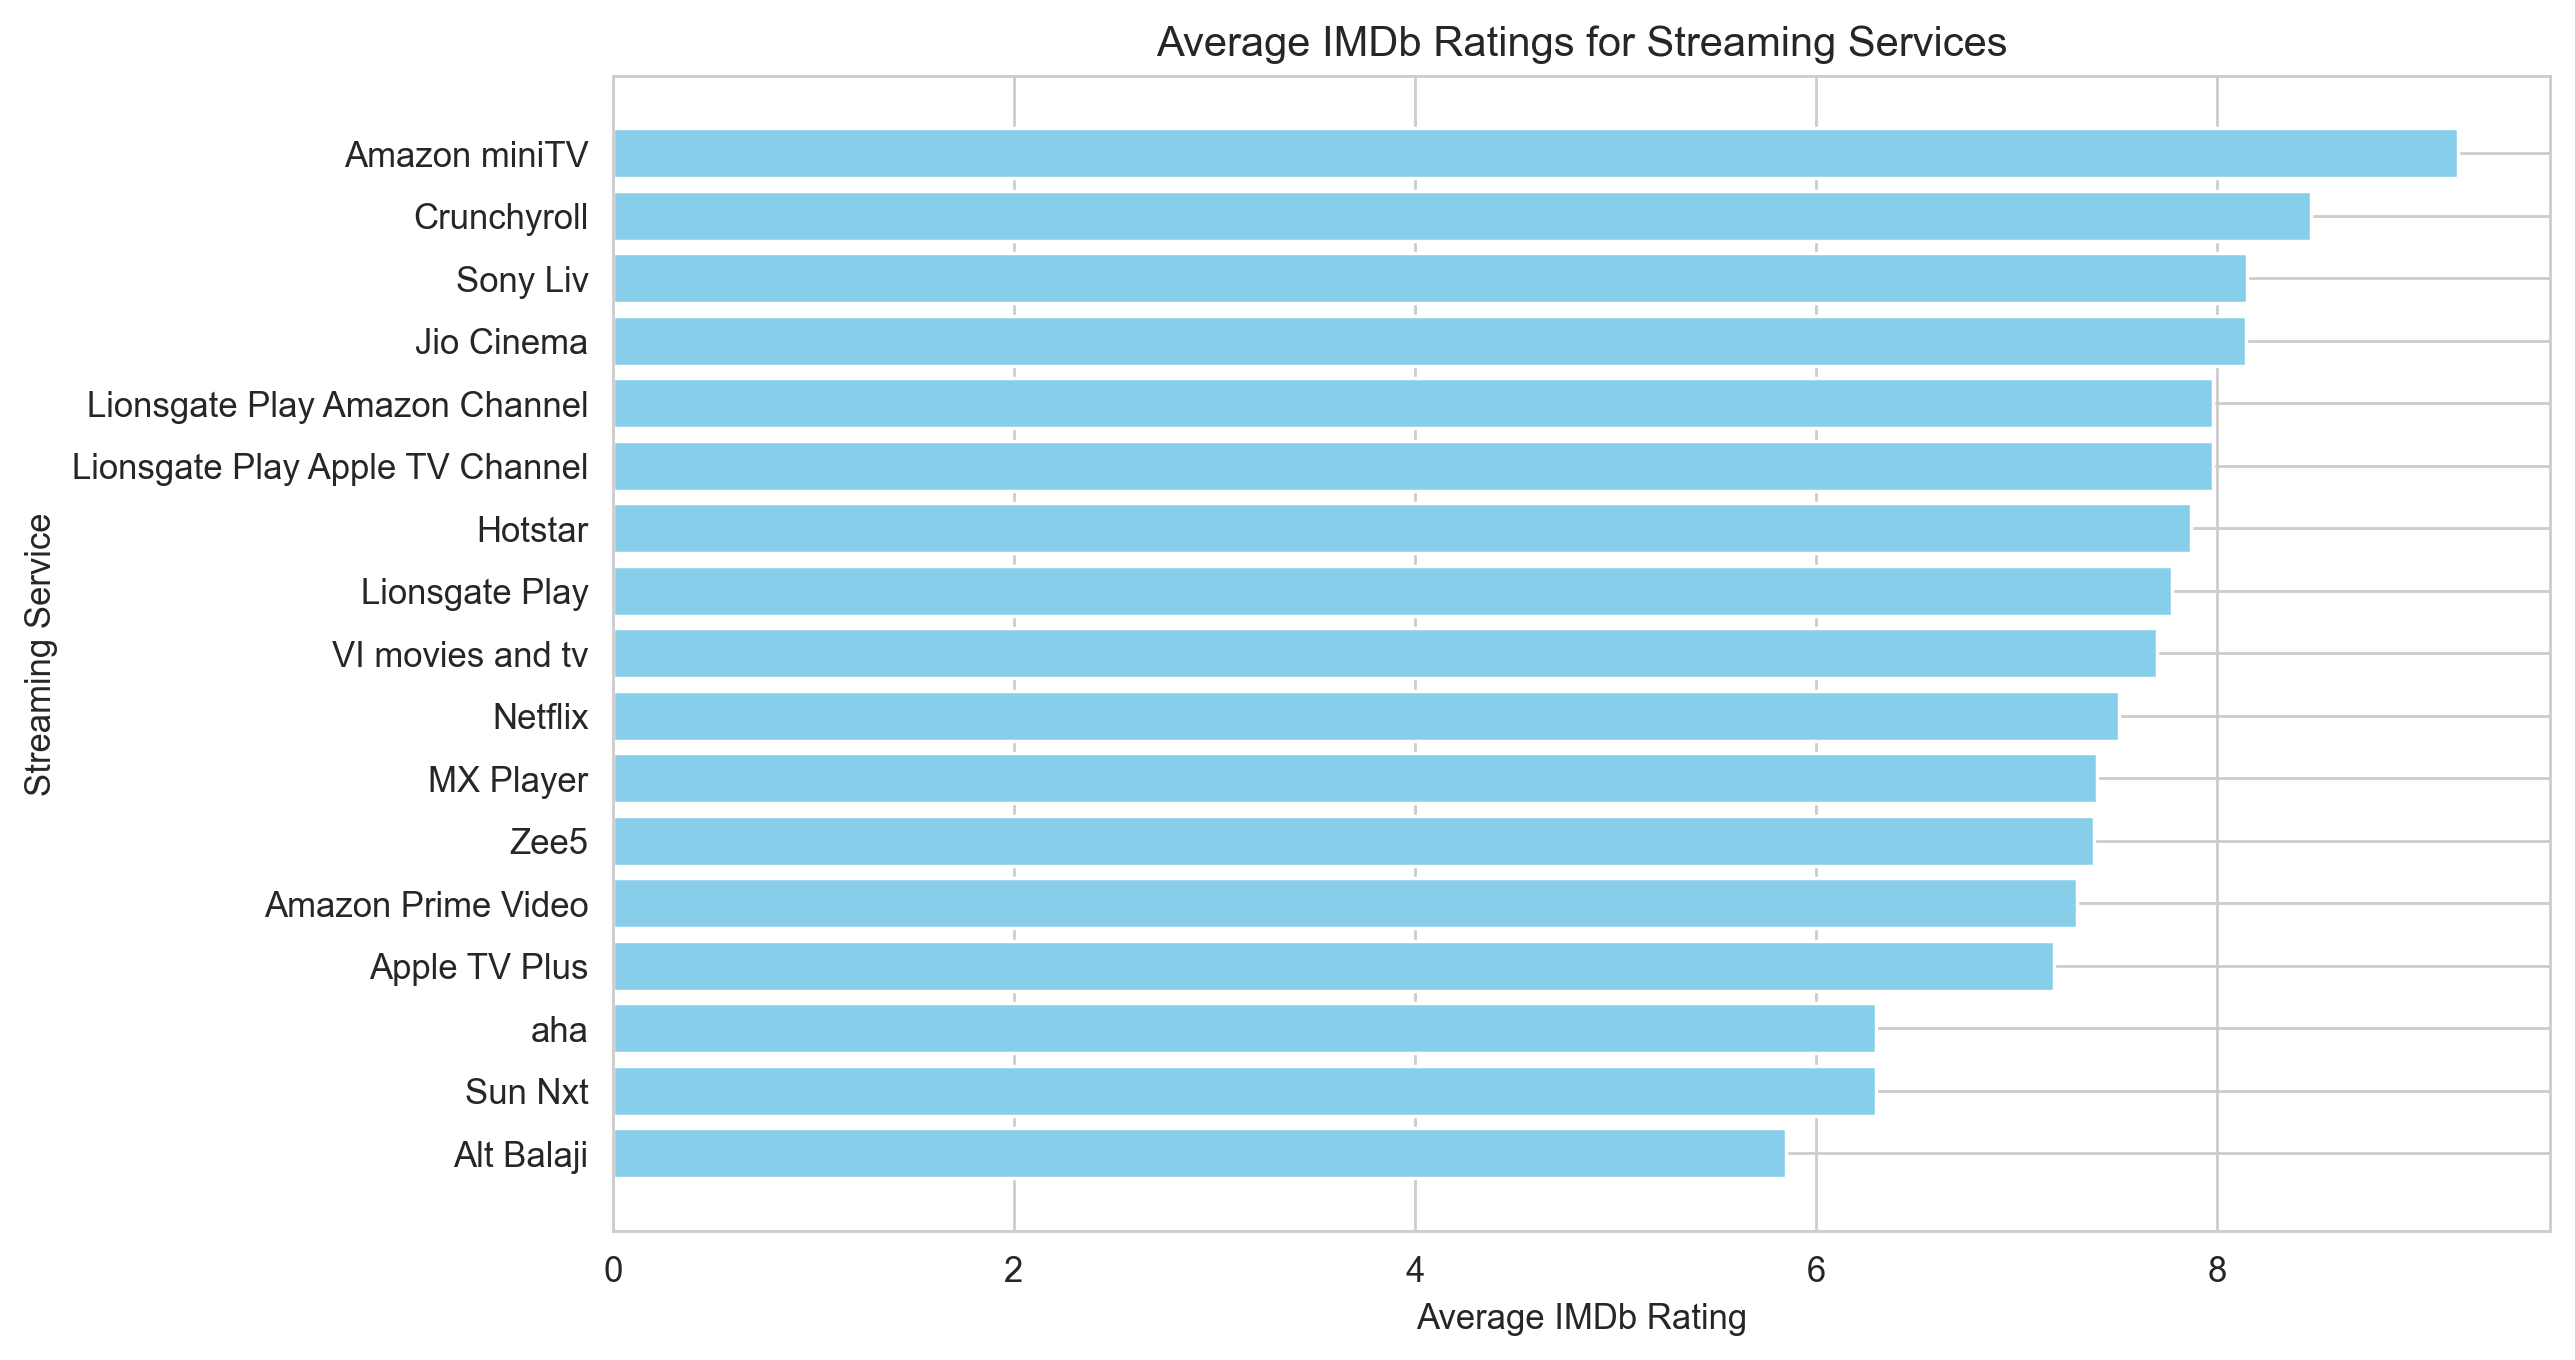

In [73]:
# Plot stream service and imdb rating.
plt.figure(figsize=(10, 6), dpi=250)

# Ploting horizontal bar plot. 
plt.barh('Stream_Service', 'Rating', data=df_mean_rating, color='skyblue')

# Giving Labels.
plt.xlabel('Average IMDb Rating')
plt.ylabel('Streaming Service')
plt.title('Average IMDb Ratings for Streaming Services')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()

Based on the provided ratings for various streaming services, several conclusions can be drawn:

**Diversity of Options**: There is a wide range of streaming services available, catering to different tastes and preferences of viewers.

**Popular Choices**: Amazon miniTV, Crunchyroll, and Sony Liv emerge as the top-rated platforms, indicating their popularity among users.

**Variety of Content**: The ratings suggest that platforms offering diverse content, such as Amazon miniTV and Crunchyroll, tend to receive higher ratings, indicating the importance of content variety in attracting and retaining viewers.

**Streaming Giants**: Traditional streaming giants like Netflix and Amazon Prime Video, while still popular, do not always have the highest ratings, suggesting that competition is increasing and newer platforms are gaining traction.

**Room for Improvement**: Some platforms like Alt Balaji, Sun Nxt, and aha have lower ratings, indicating potential areas for improvement in content quality or user experience.

**Platform-Specific Channels**: It's interesting to note that certain platforms offer channel services (e.g., Lionsgate Play Amazon Channel, Lionsgate Play Apple TV Channel), which also receive decent ratings, showing that users appreciate the additional content options.

Overall, the ratings reflect the diverse landscape of streaming services, with each platform striving to offer unique content and experiences to attract and retain viewers in a competitive market.


### Analyziing TOP NETFLIX MOVIE and SHOWS

In [74]:
# Selecting movies from the dataset that are available on Netflix and are of type 'Movie',
# then filtering columns to only include 'Title' and 'imdb_rating'.
# Sorting the resulting DataFrame by 'imdb_rating' in descending order and resetting the index.
top_on_netflix_movie = final_data[final_data['Stream_Service'].fillna('').apply(lambda x: 'Netflix' in x) & (final_data['Type'] == 'Movie')][['Title', 'imdb_rating']].sort_values('imdb_rating', ascending=False).reset_index(drop=True)

In [75]:
#Printing top movie on netflix.
print(top_on_netflix_movie)

                    Title  imdb_rating
0            Interstellar          8.7
1                  Snatch          8.2
2                Hi Nanna          8.2
3     Catch Me If You Can          8.1
4       Blade Runner 2049          8.0
5                    Dune          8.0
6         To Kill a Tiger          7.6
7   Anweshippin Kandethum          7.5
8                     Leo          7.2
9         Merry Christmas          7.1
10                  Jawan          7.0
11         Murder Mubarak          6.8
12                  Dunki          6.7
13                Fighter          6.7
14                 Salaar          6.5
15                 Animal          6.2
16                 Damsel          6.1
17         Code 8 Part II          5.7
18               Spaceman          5.7
19          Guntur Kaaram          5.4
20               365 Days          3.3


**Based on the output provided, it can be concluded that "Intersteller" is the highest-rated movie with an IMDb rating of 8.7, suggesting it has been well-received by viewers. Following "Intersteller" the ratings gradually decrease, indicating a range of reception among the other listed movies.**

In [76]:
# Selecting movies from the dataset that are available on Netflix and are of type 'Show',
# then filtering columns to only include 'Title' and 'imdb_rating'.
# Sorting the resulting DataFrame by 'imdb_rating' in descending order and resetting the index.
top_on_netflix_show = final_data[final_data['Stream_Service'].fillna('').apply(lambda x: 'Netflix' in x) & (final_data['Type'] == 'Show')][['Title', 'imdb_rating']].sort_values('imdb_rating', ascending=False).reset_index(drop=True)

In [77]:
#Printing top shows on netflix.
print(top_on_netflix_show)

                                                Title  imdb_rating
0                                        Breaking Bad          9.5
1                                      Peaky Blinders          8.8
2                                    Naruto Shippūden          8.7
3                                     Stranger Things          8.7
4                                       One-Punch Man          8.7
5                                         Yellowstone          8.7
6                      Demon Slayer: Kimetsu no Yaiba          8.7
7                                      Jujutsu Kaisen          8.6
8   The Railway Men - The Untold Story of Bhopal 1984          8.5
9                                           Shameless          8.5
10                                             Naruto          8.4
11                                          ONE PIECE          8.3
12                                      The Gentlemen          8.3
13                                        Money Heist         

**Based on the output, it's evident that "Breaking Bad" holds the highest IMDb rating among all listed titles, standing at an impressive 9.5. Additionally, a noteworthy observation is the prominence of animated series within the high-rated titles, such as "Naruto Shippūden," "Demon Slayer: Kimetsu no Yaiba," and "Avatar: The Last Airbender." This prevalence underscores the significant popularity of anime among contemporary audiences, highlighting its widespread appeal and influence in today's entertainment landscape.**

# Exporting Datasets.

In [78]:
# Save the DataFrame 'data_show' to a CSV file named 'JustWatch_Show.csv' without including row indices.

data_show.to_csv('JustWatch_Show', index=False)

In [79]:
# Save the DataFrame 'data_movie' to a CSV file named 'JustWatch_Movie.csv' without including row indices.

data_movie.to_csv('JustWatch_Movie', index=False)

In [80]:
# Save the DataFrame 'final_data' to a CSV file named 'JustWatch.csv' without including row indices.

final_data.to_csv('Justwatch', index=False)